In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

In [2]:
class Plot:
    def __init__(self, file, names):        
        n_all = [pd.read_csv('stats/node_{}/{}'.format(node, file), sep=',', header=None,
                             names=names+['time_us']) for node in [1,2,3]]
        
        x = pd.concat(n_all)   
        
        steps = x['epochs']*x['dataset size']/x['batch']

        x['time_ms'] = x['time_us']/steps/1000
        
        df = x.drop(columns=['epochs', 'dataset size', 'time_us'])
        
        self.df = df
        
    def plot(self, ax, feat, label=None, fsize=40, dotsize=300):
        dfs = [self.df[self.df['nodes']==node] for node in [1,2,3]]
        
        def org(df):
            return df[[feat, 'time_ms']].groupby(by=[feat]).mean().reset_index()
        
        colors = ['r','g','b']
        lines = [3,3,1]
        for j,marker in enumerate(['x','+','o']):
            _df = org(dfs[j])
            ax.scatter(_df[feat], _df['time_ms'], label='nodes: {}'.format(j+1), marker=marker,
                        s=dotsize,
                        color=colors[j], 
                        linewidths=lines[j] 
                       )

        ax.legend(fontsize=fsize+10)
        ax.set_xlabel(feat if label == None else label, fontsize=fsize)
        ax.set_ylabel('Χρόνος Εκτέλεσης (ms)', fontsize=fsize)

        ax.tick_params(labelsize=fsize)
        ax.grid(b=True)
    
    def _check(self, dim, fw):
        assert dim in [1,2]
        assert fw in ['tflow', 'ptorch']
        
    def all_names(self):
        return ['epochs', 'dataset size', 'numf', 'channels', 'batch', 'nodes']
    
    def dense_names(self):
        return ['epochs', 'dataset size', 'numf', 'batch', 'nodes', 'units']
    
    def the_fw(self, fw):
        assert fw in ['tflow', 'ptorch']
        dct = {'tflow':'TensorFlow', 'ptorch':'PyTorch'}
        
        return dct[fw]
        

In [3]:
class Conv(Plot):
    def __init__(self, dim, fw):
        super()._check(dim, fw)
        
        self.file = 'conv{}d.{}'.format(dim, fw)
        super().__init__(self.file, super().all_names() + ['kernel', 'stride', 'filters'])
        
        self.title = 'Convolutional {}D - {}'.format(dim, self.the_fw(fw))

In [4]:
class Pool(Plot):
    def __init__(self, typ, dim, fw):
        assert typ in ['avg', 'max']
        super()._check(dim, fw)
        
        self.file = '{}{}d.{}'.format(typ, dim, fw)
        super().__init__(self.file, super().all_names() + ['pool', 'stride'])
        
        dct = {'avg':'Average Pooling', 'max':'Max Pooling'}
        self.title = '{} {}D - {}'.format(dct[typ], dim, self.the_fw(fw))

In [5]:
class Drop(Plot):
    def __init__(self, dim, fw):
        super()._check(dim, fw)
        self.file = 'drop{}d.{}'.format(dim, fw)
        
        super().__init__(self.file, super().all_names() + ['drop'])
        
        self.title = 'Dropout {}D - {}'.format(dim, self.the_fw(fw))

In [6]:
class Rest(Plot):
    def __init__(self, typ, dim, fw):
        assert typ in ['norm', 'relu', 'tanh', 'flatten']
        super()._check(dim, fw)
        assert not ((typ=='flatten') & (fw=='tflow'))
        
        self.file = '{}{}d.{}'.format(typ, dim, fw)
        super().__init__(self.file, super().all_names())
        
        dct = {'norm':'Batch Normalization', 'relu':'ReLU', 'tanh':'Tanh', 'flatten':'Flatten'}
        self.title = '{} {}D - {}'.format(dct[typ], dim, self.the_fw(fw))

In [7]:
class Dense(Plot):
    def __init__(self, fw, _final=False):
        assert fw in ['tflow', 'ptorch']
        final = _final if fw=='tflow' else True
        
        self.file = 'dense.{}'.format(fw) if final==False else 'final_dense.{}'.format(fw)
        super().__init__(self.file, super().dense_names())
        
        self.title = 'Fully Connected - {}'.format(self.the_fw(fw))

In [8]:
def sub(x,y,title,scale,fsize=40):
    fig, axs = plt.subplots(x, y, figsize=[scale*6.4, scale*4.8], constrained_layout=True)
    fig.suptitle(title, fontsize=fsize)
    return fig, axs

# Set TensorFlow or PyTorch

In [9]:
fws = ['tflow', 'ptorch']

In [21]:
fw = fws[1]

In [22]:
fw

'ptorch'

# Plot FC

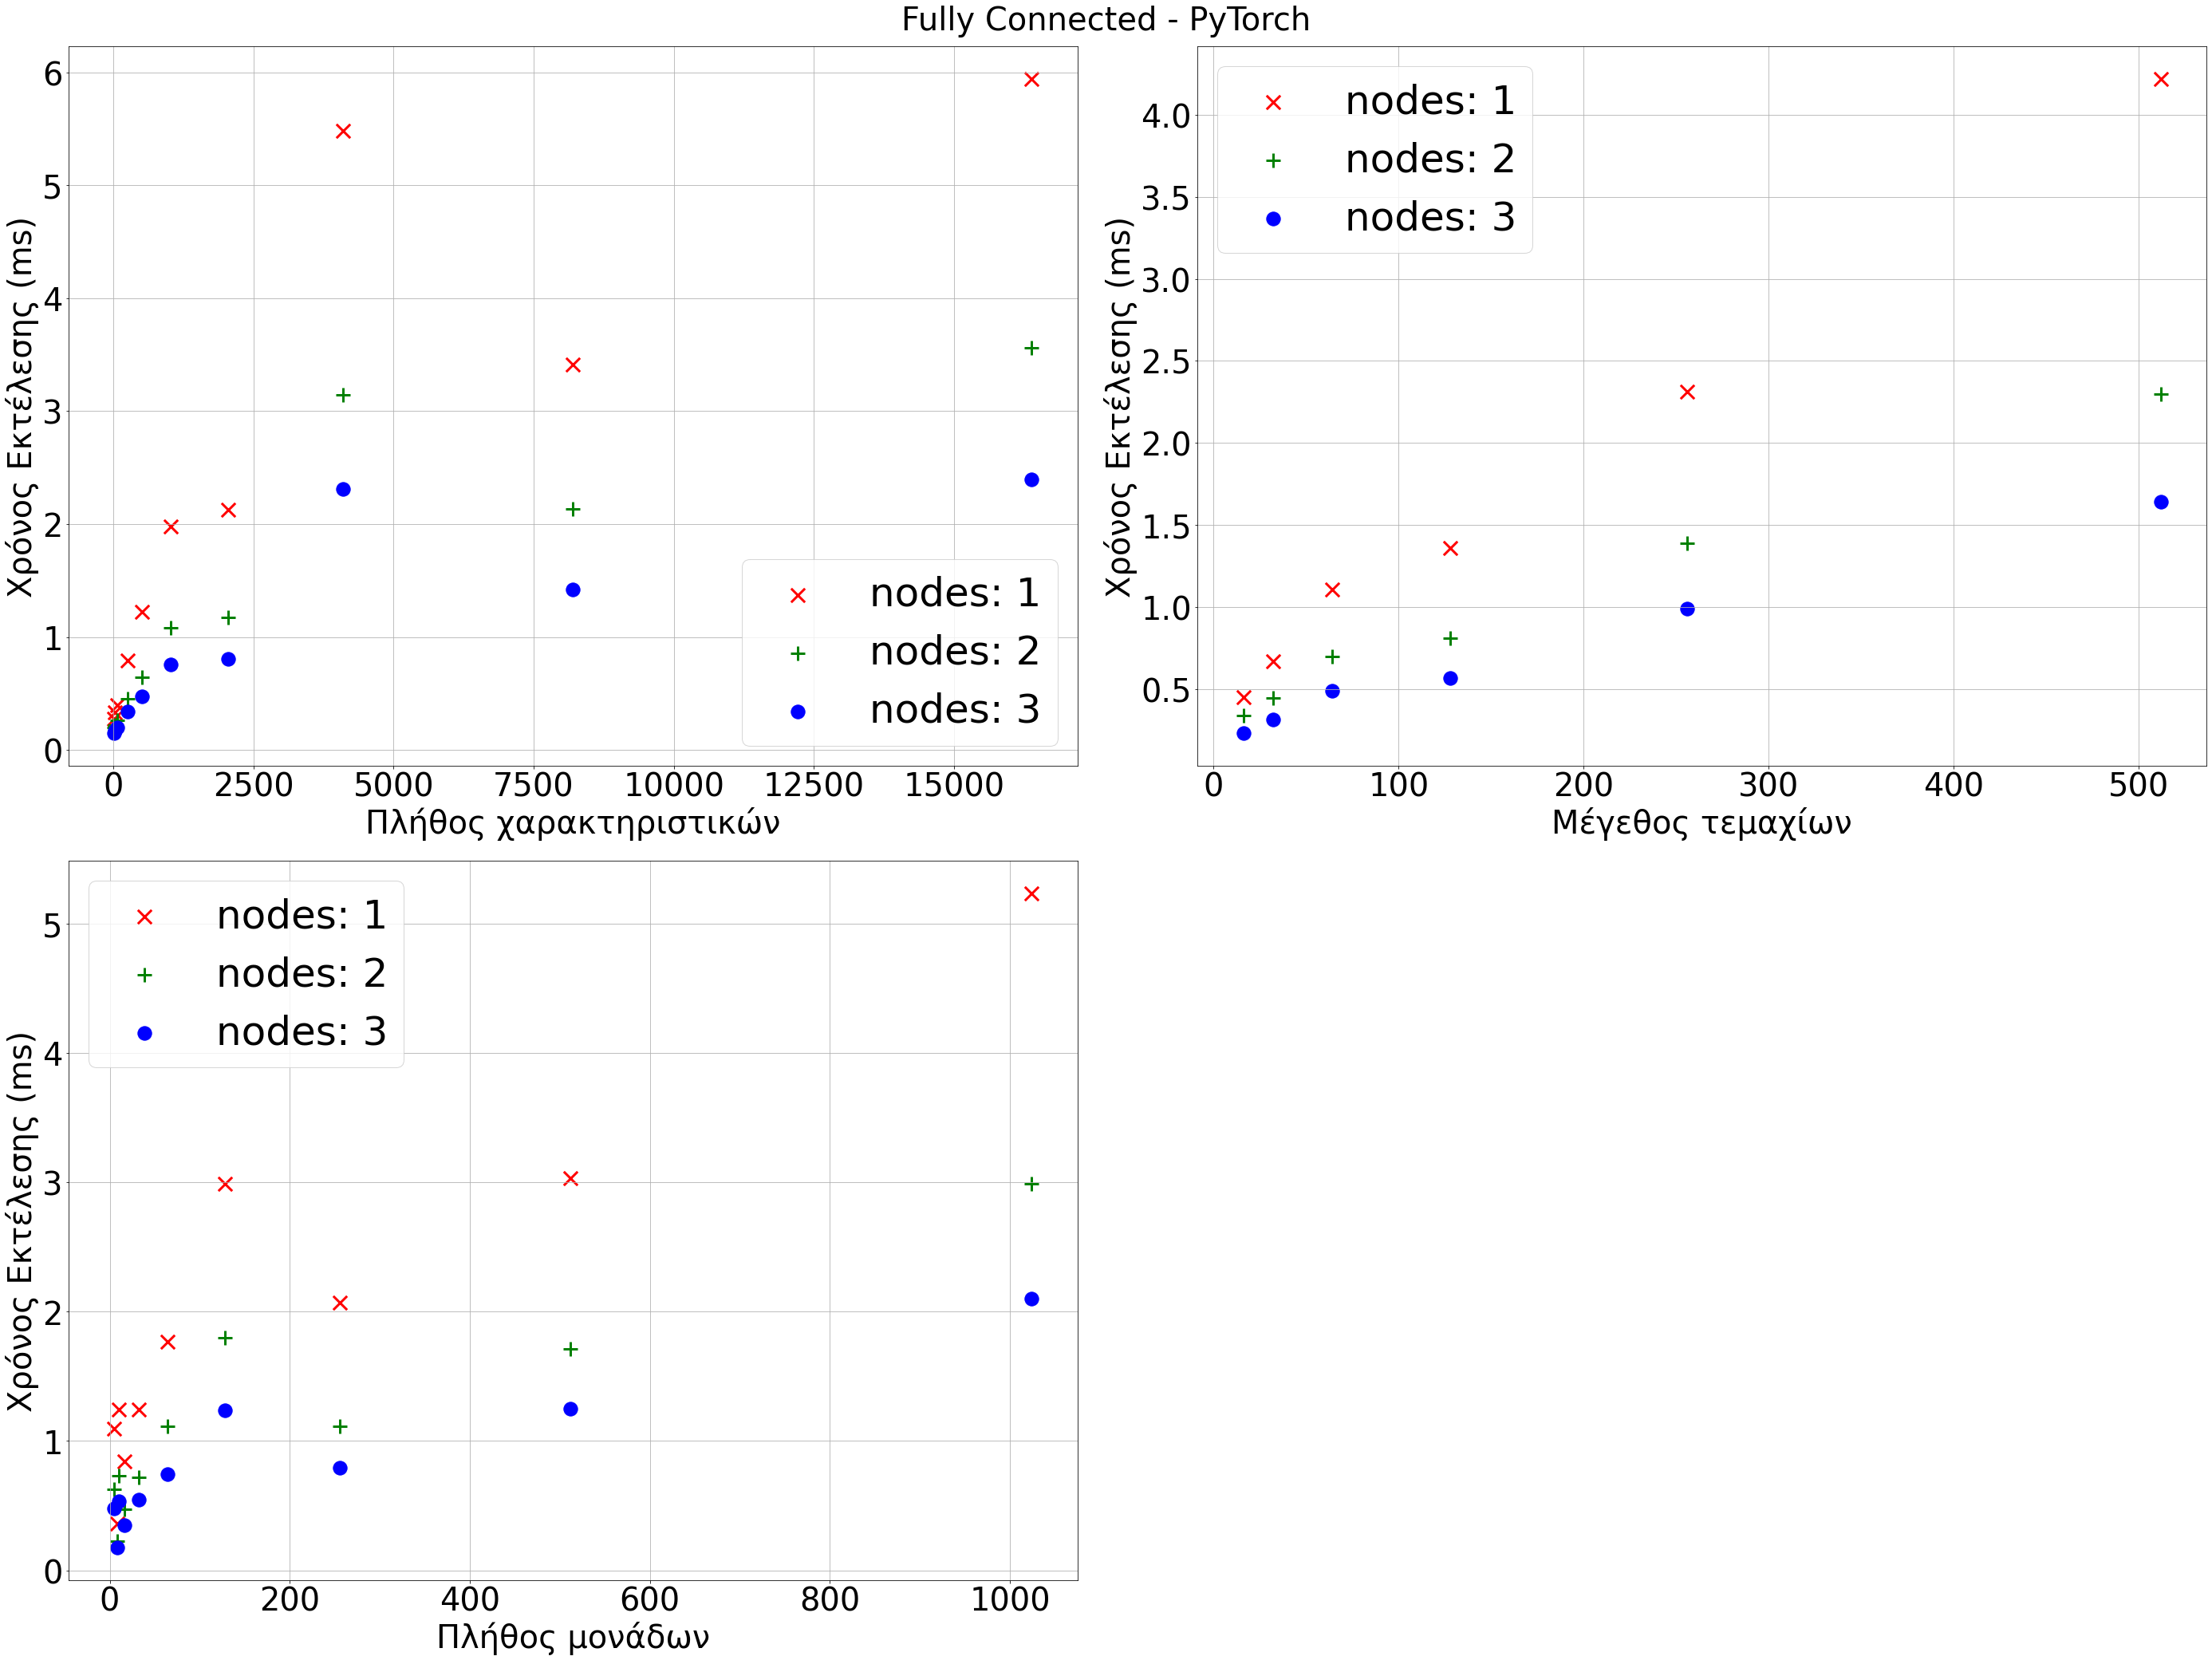

In [23]:
p = Dense(fw)

fig, axs = sub(2,2,'Fully Connected - {}'.format(p.the_fw(fw)),6)
axs[1,1].set_visible(False)

p.plot(axs[0,0], 'numf', 'Πλήθος χαρακτηριστικών')
p.plot(axs[0,1], 'batch', 'Μέγεθος τεμαχίων')
p.plot(axs[1,0], 'units', 'Πλήθος μονάδων')

plt.savefig('plots/{}_dense'.format(fw), facecolor='white')

# Set Dimension

In [24]:
dim = 2

# Plot all the rest

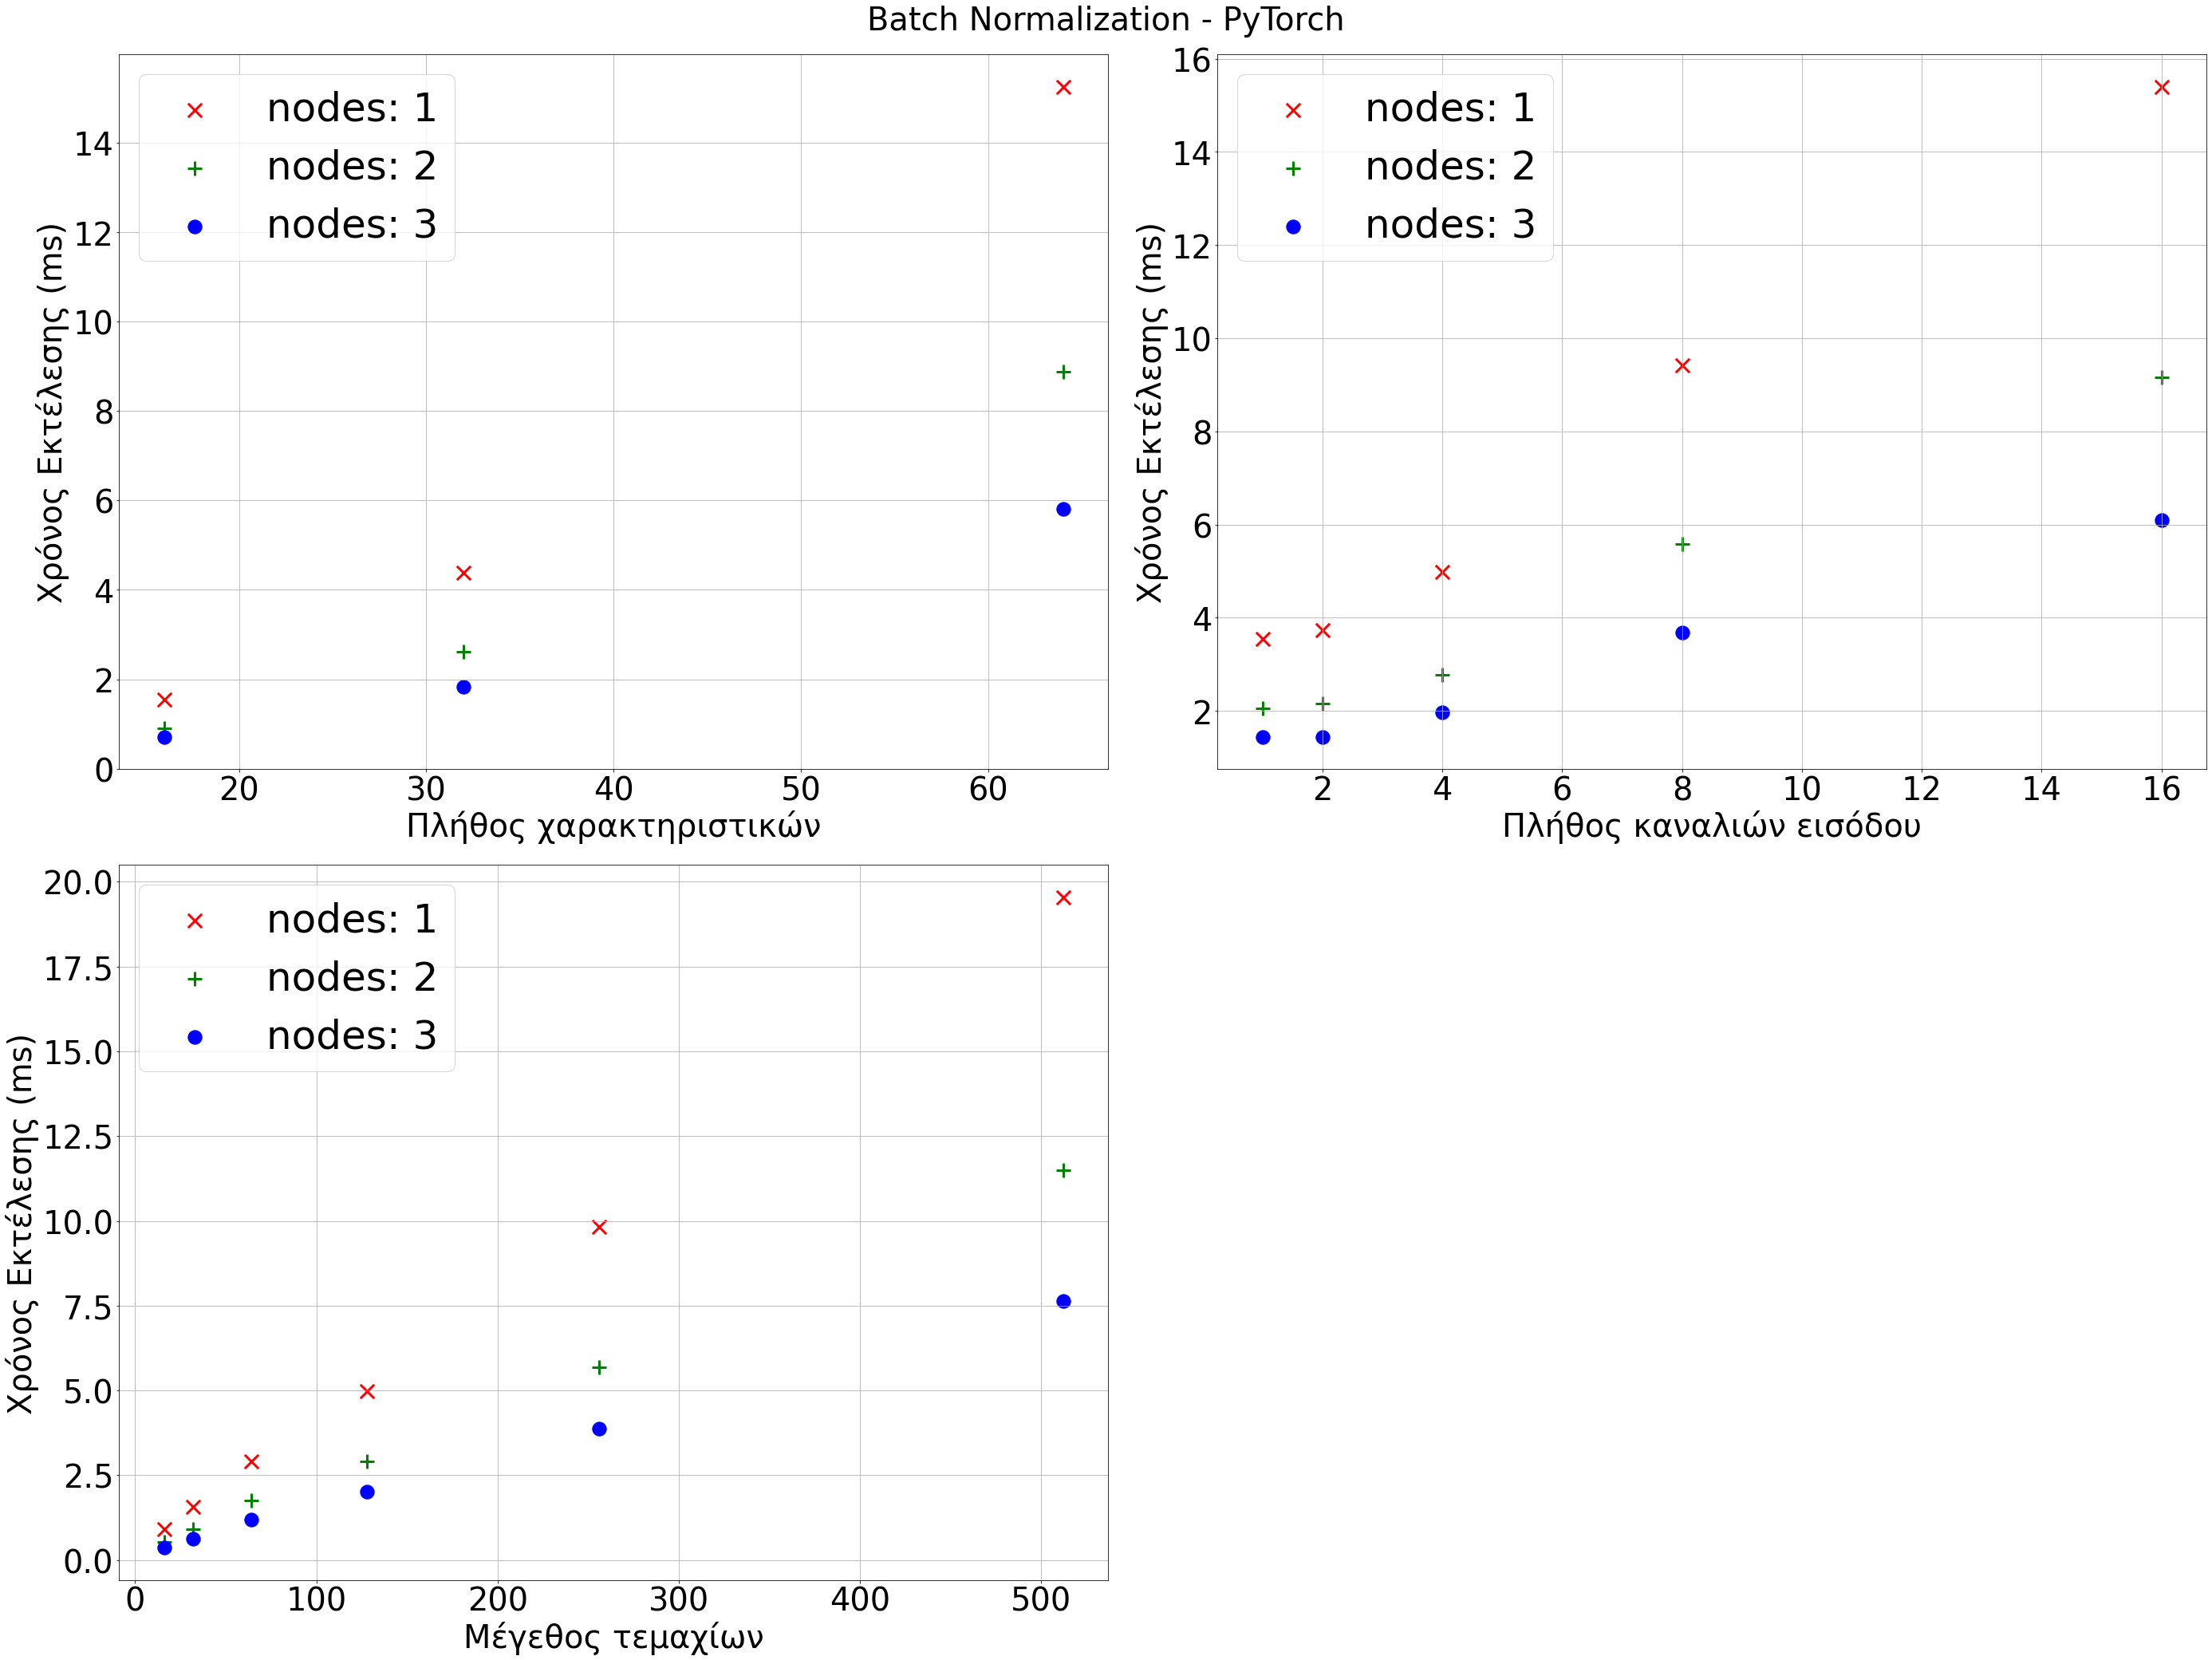

In [25]:
p = Rest('norm', dim, fw)

fig, axs = sub(2,2,'Batch Normalization - {}'.format(p.the_fw(fw)),6)
axs[1,1].set_visible(False)

p.plot(axs[0,0], 'numf', 'Πλήθος χαρακτηριστικών')
p.plot(axs[0,1], 'channels', 'Πλήθος καναλιών εισόδου')
p.plot(axs[1,0], 'batch', 'Μέγεθος τεμαχίων')

plt.savefig('plots/{}_norm{}d'.format(fw,dim), facecolor='white')

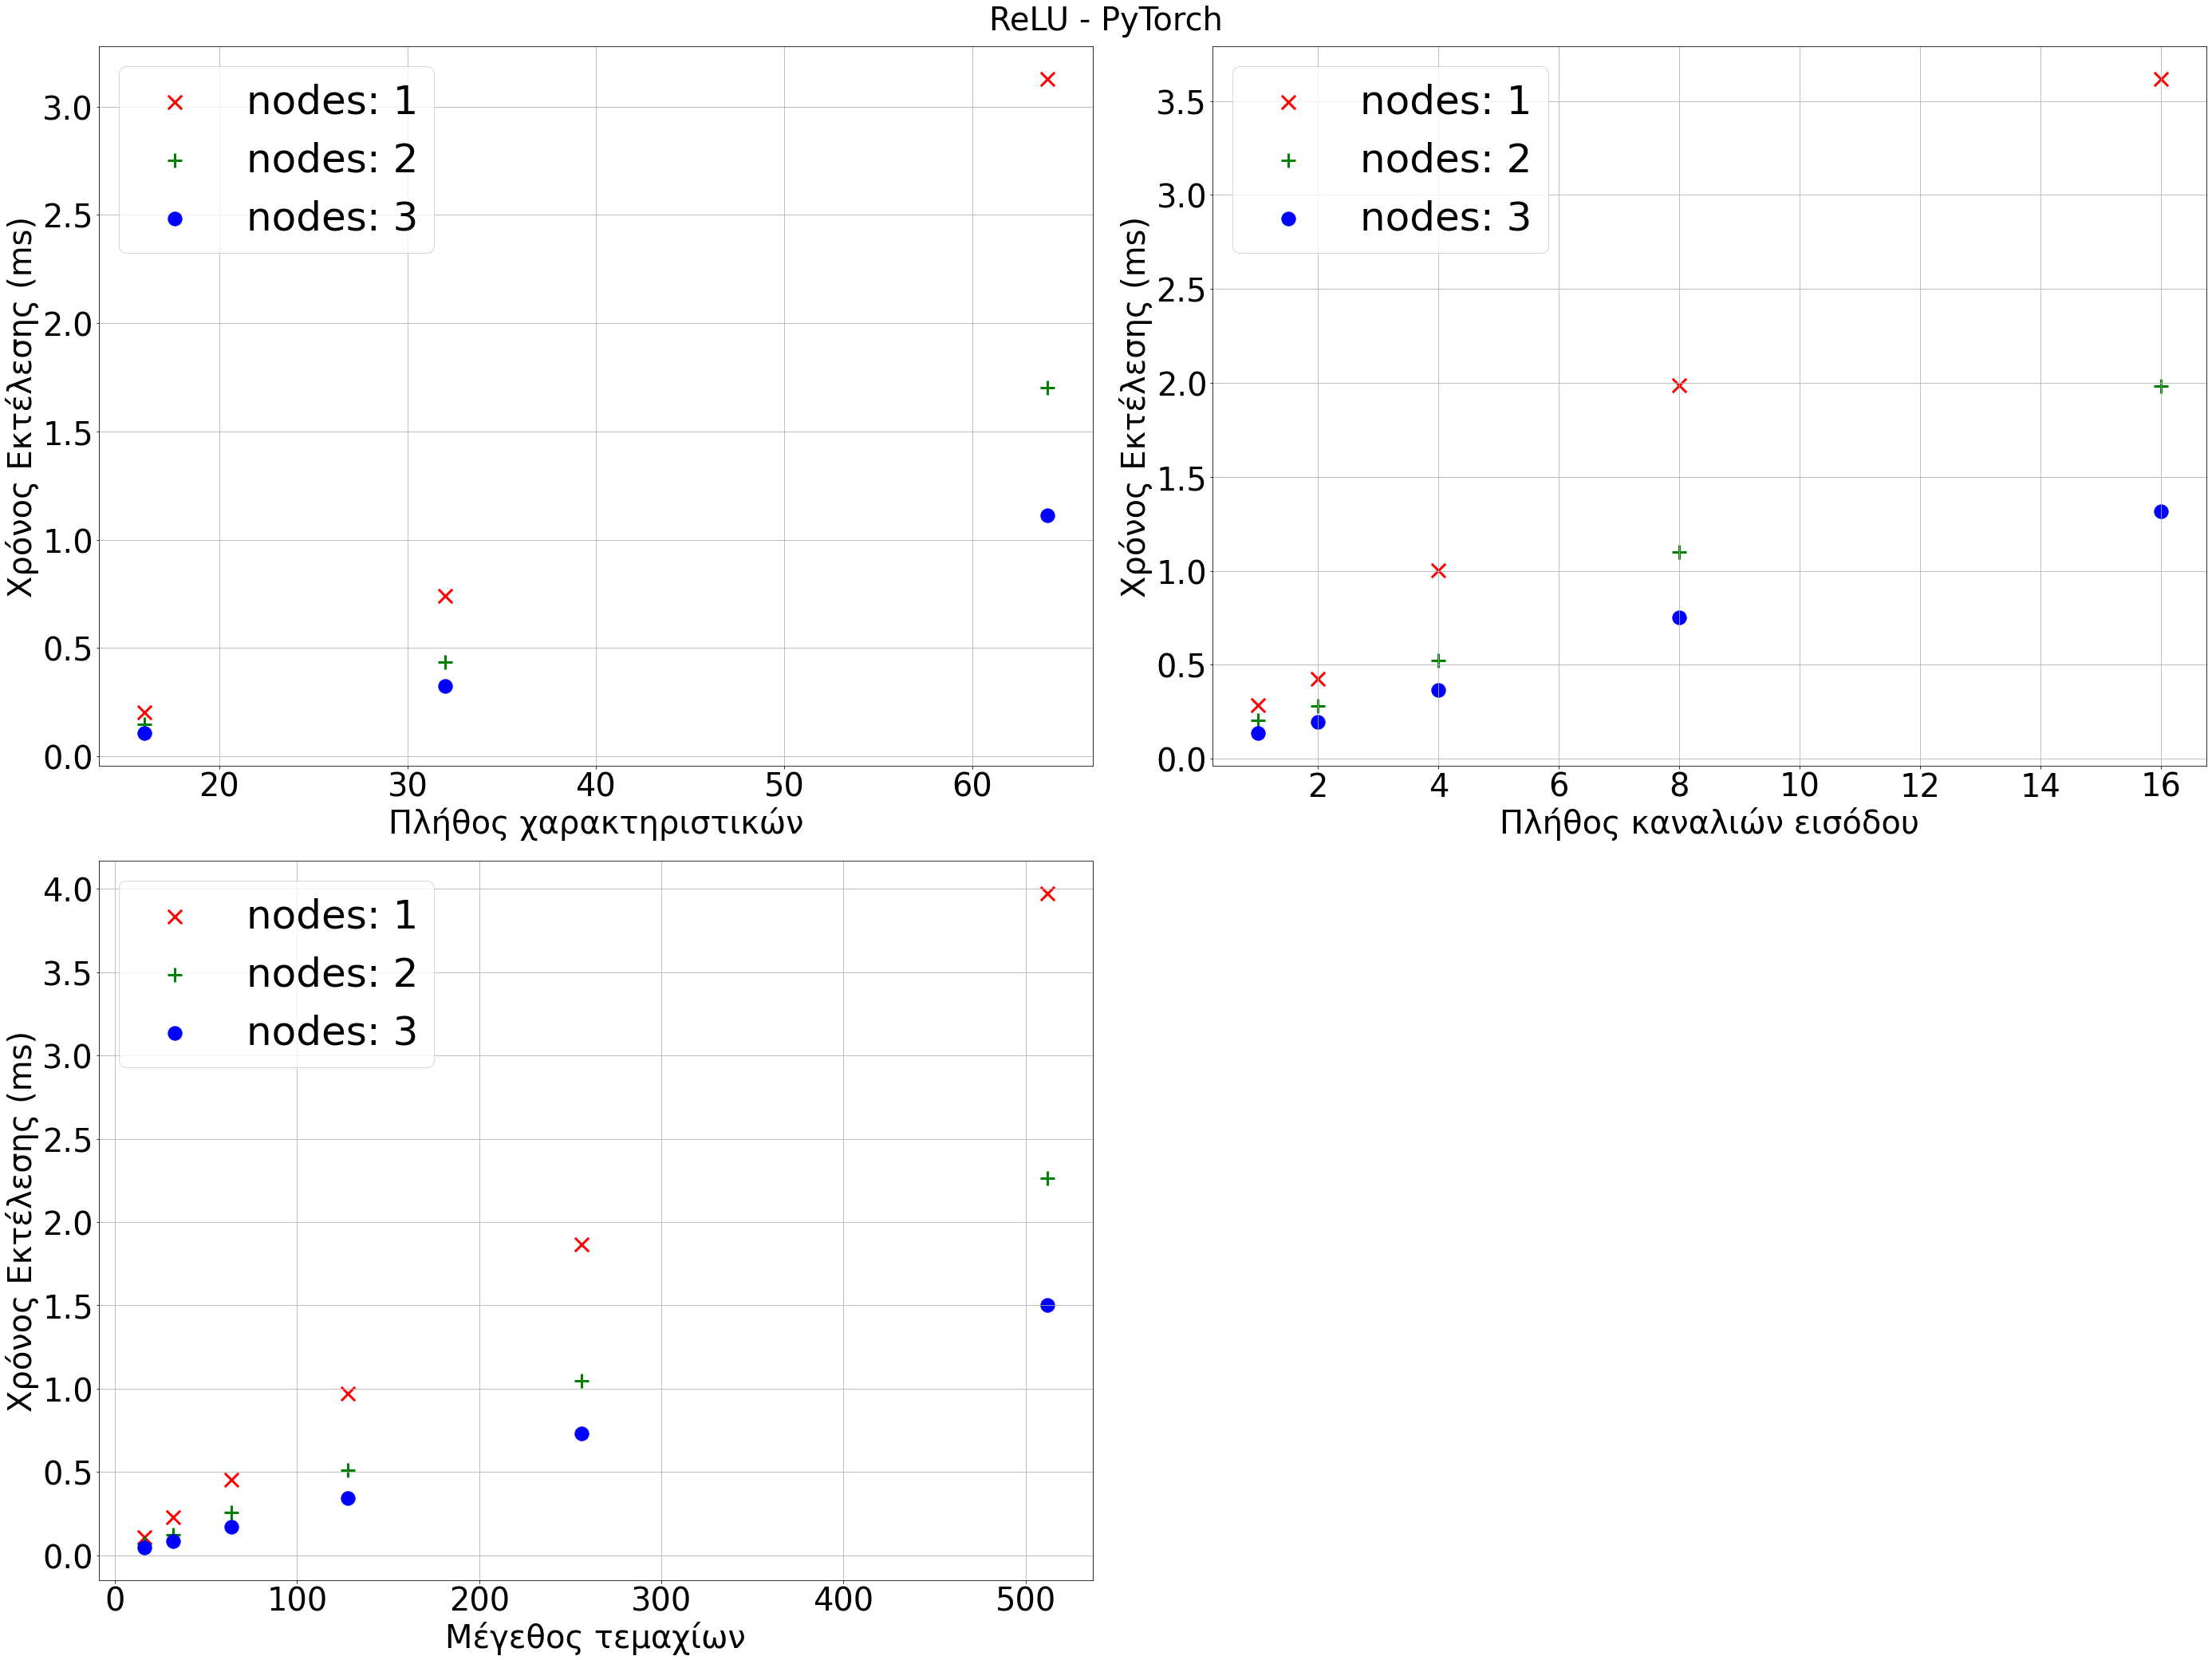

In [26]:
p = Rest('relu', dim, fw)

fig, axs = sub(2,2,'ReLU - {}'.format(p.the_fw(fw)),6)
axs[1,1].set_visible(False)

p.plot(axs[0,0], 'numf', 'Πλήθος χαρακτηριστικών')
p.plot(axs[0,1], 'channels', 'Πλήθος καναλιών εισόδου')
p.plot(axs[1,0], 'batch', 'Μέγεθος τεμαχίων')

plt.savefig('plots/{}_relu{}d'.format(fw,dim), facecolor='white')

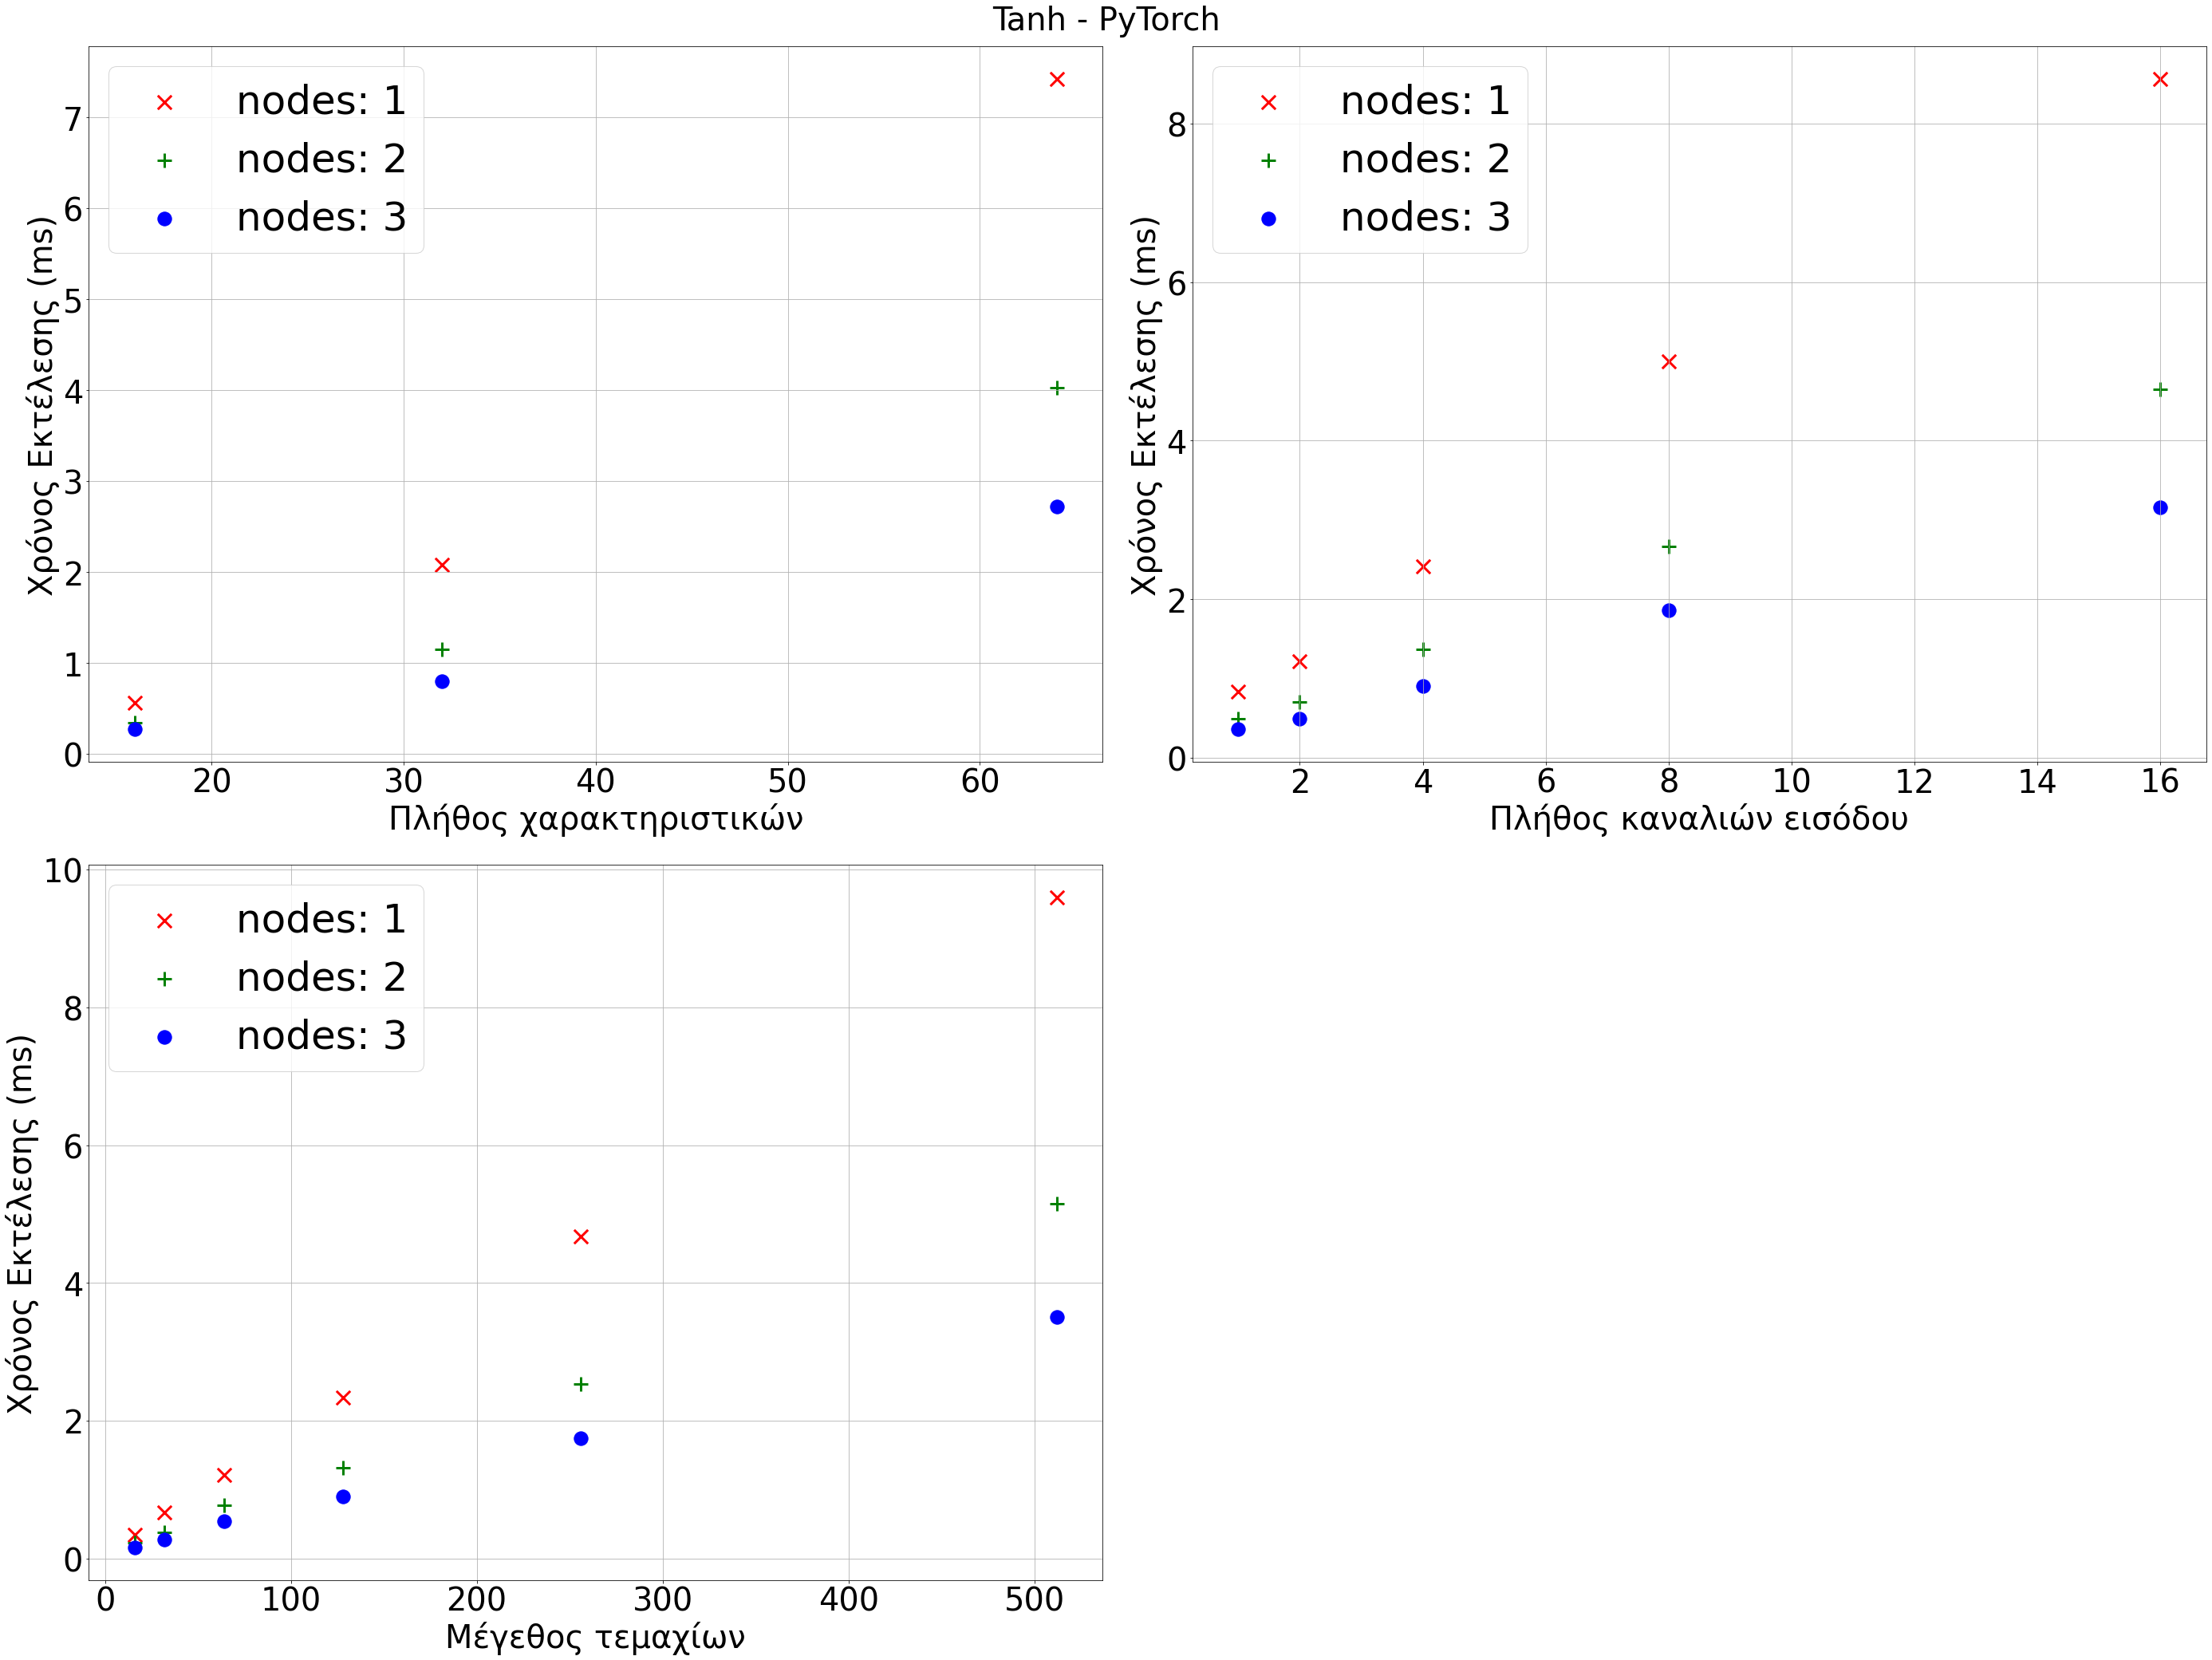

In [27]:
p = Rest('tanh', dim, fw)

fig, axs = sub(2,2,'Tanh - {}'.format(p.the_fw(fw)),6)
axs[1,1].set_visible(False)

p.plot(axs[0,0], 'numf', 'Πλήθος χαρακτηριστικών')
p.plot(axs[0,1], 'channels', 'Πλήθος καναλιών εισόδου')
p.plot(axs[1,0], 'batch', 'Μέγεθος τεμαχίων')

plt.savefig('plots/{}_tanh{}d'.format(fw,dim), facecolor='white')

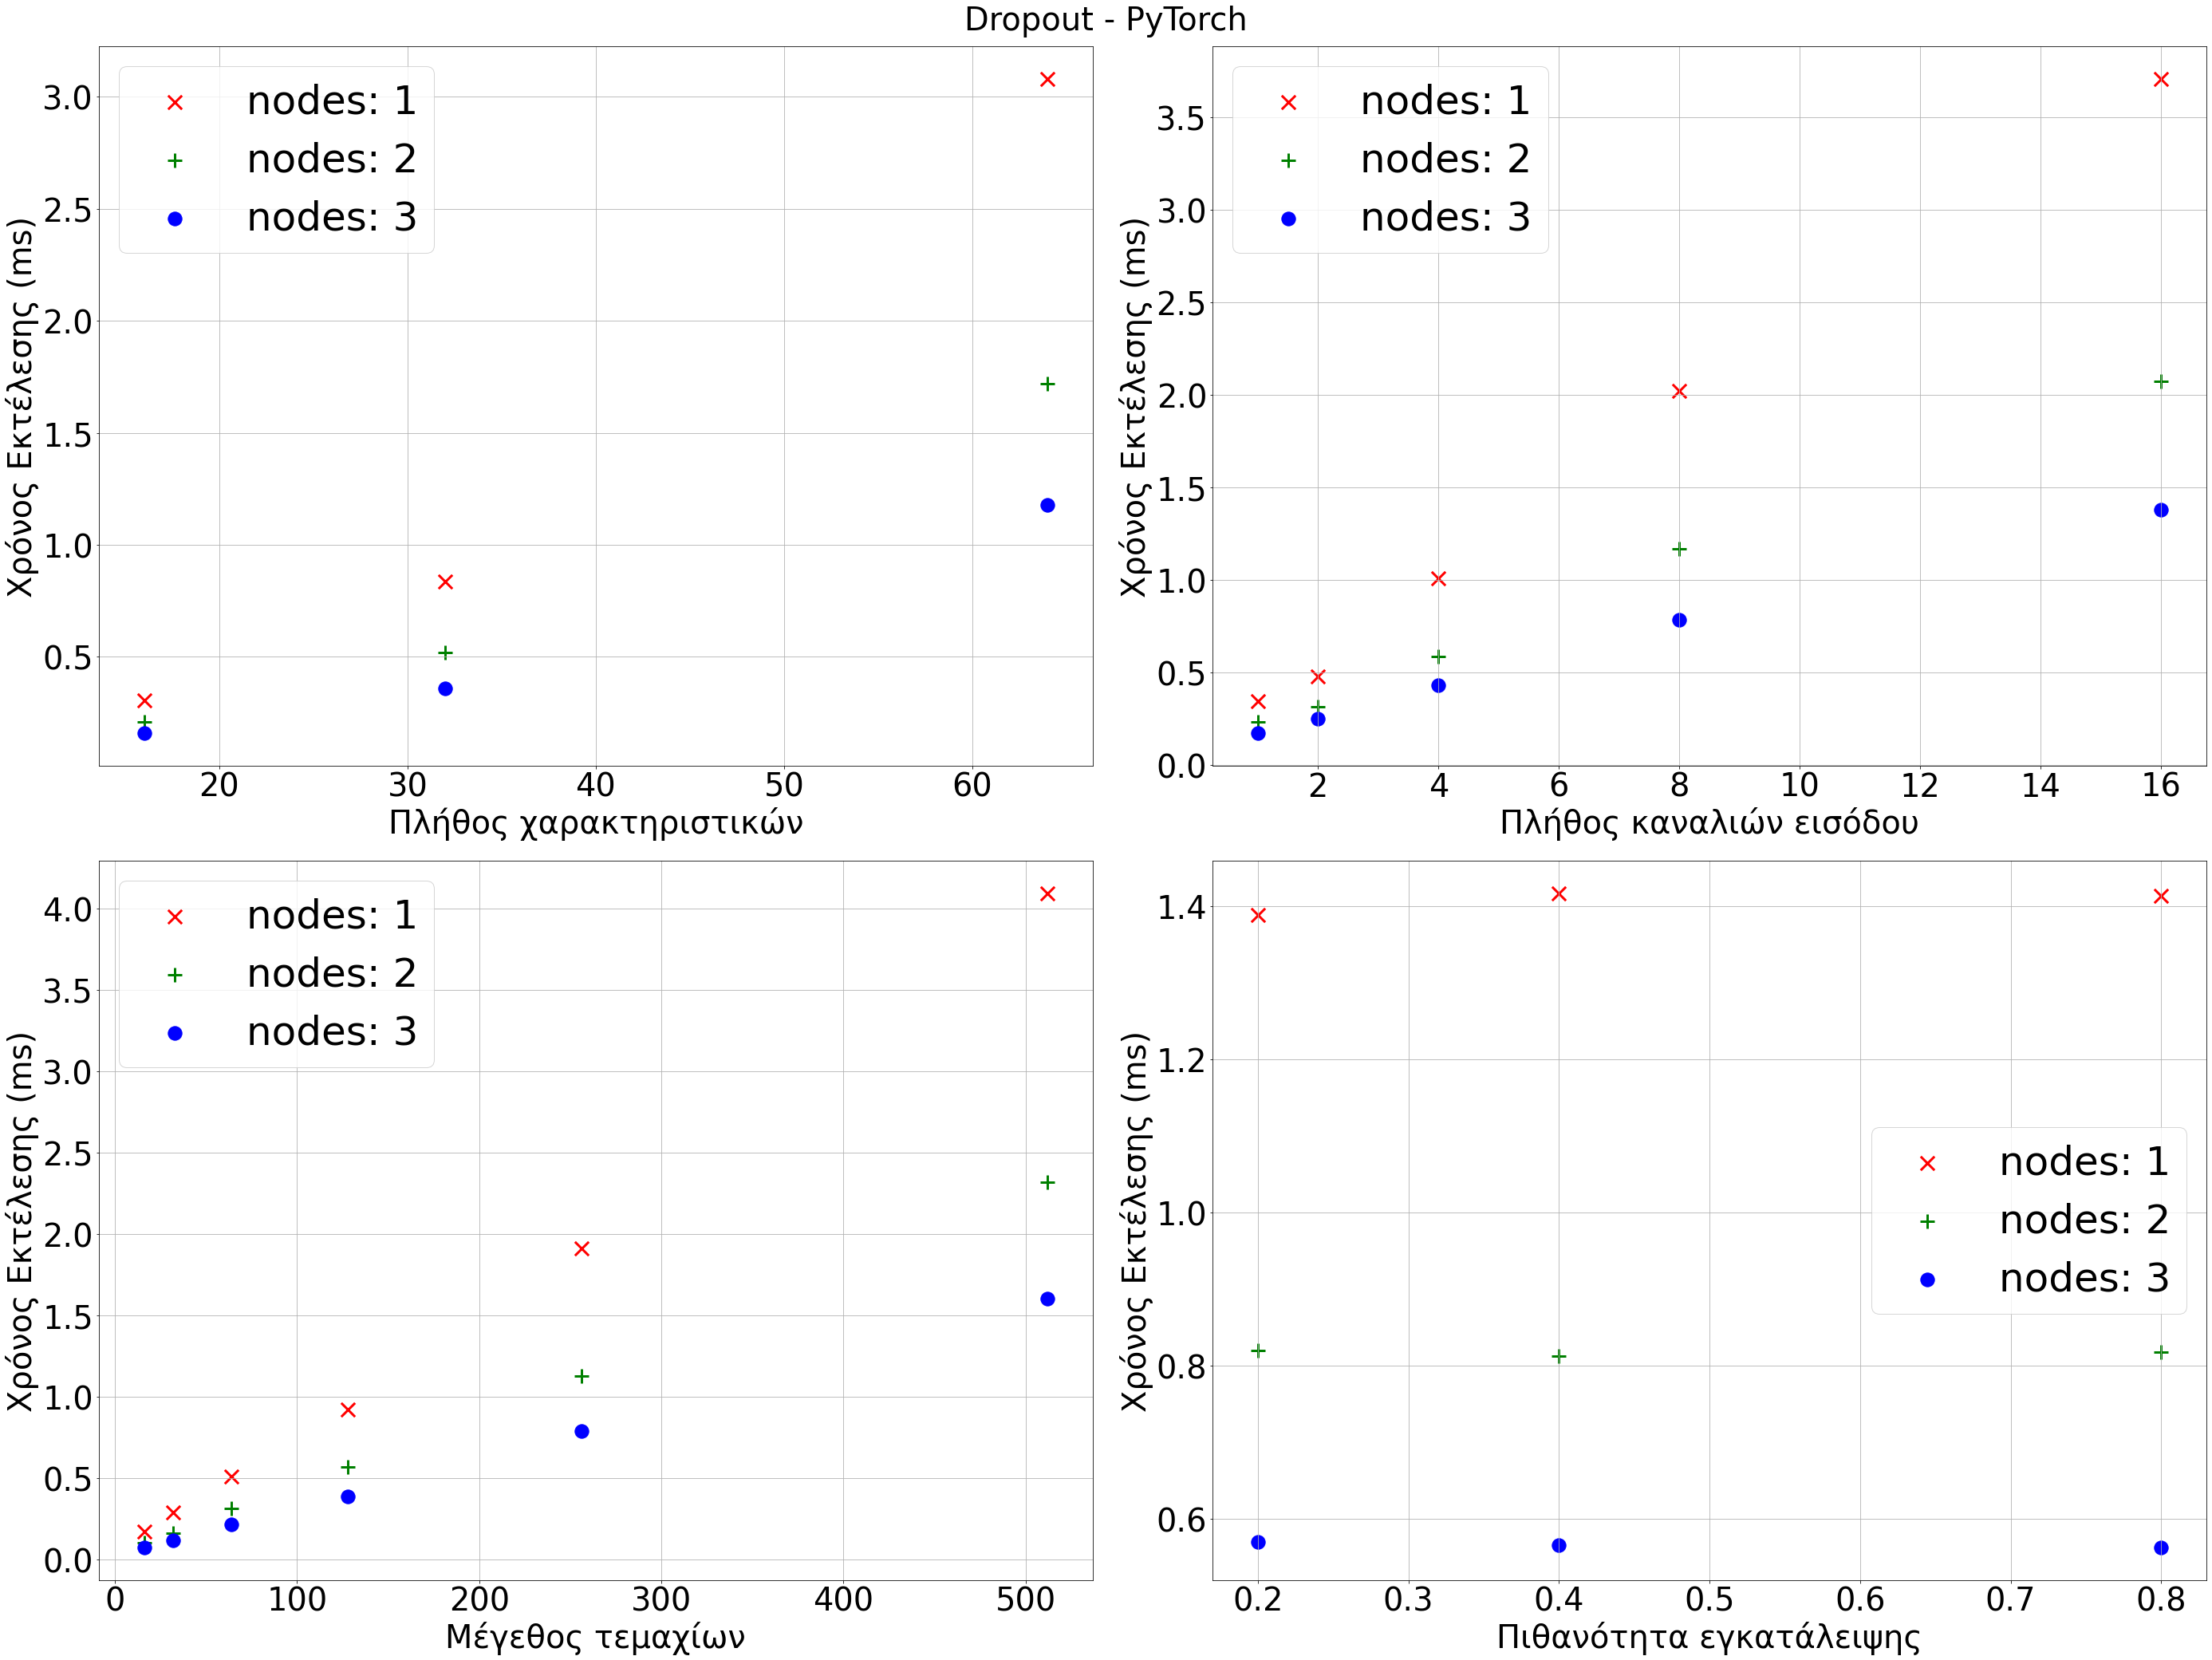

In [28]:
p = Drop(dim, fw)

fig, axs = sub(2,2,'Dropout - {}'.format(p.the_fw(fw)),6)

p.plot(axs[0,0], 'numf', 'Πλήθος χαρακτηριστικών')
p.plot(axs[0,1], 'channels', 'Πλήθος καναλιών εισόδου')
p.plot(axs[1,0], 'batch', 'Μέγεθος τεμαχίων')
p.plot(axs[1,1], 'drop', 'Πιθανότητα εγκατάλειψης')

plt.savefig('plots/{}_drop{}d'.format(fw,dim), facecolor='white')

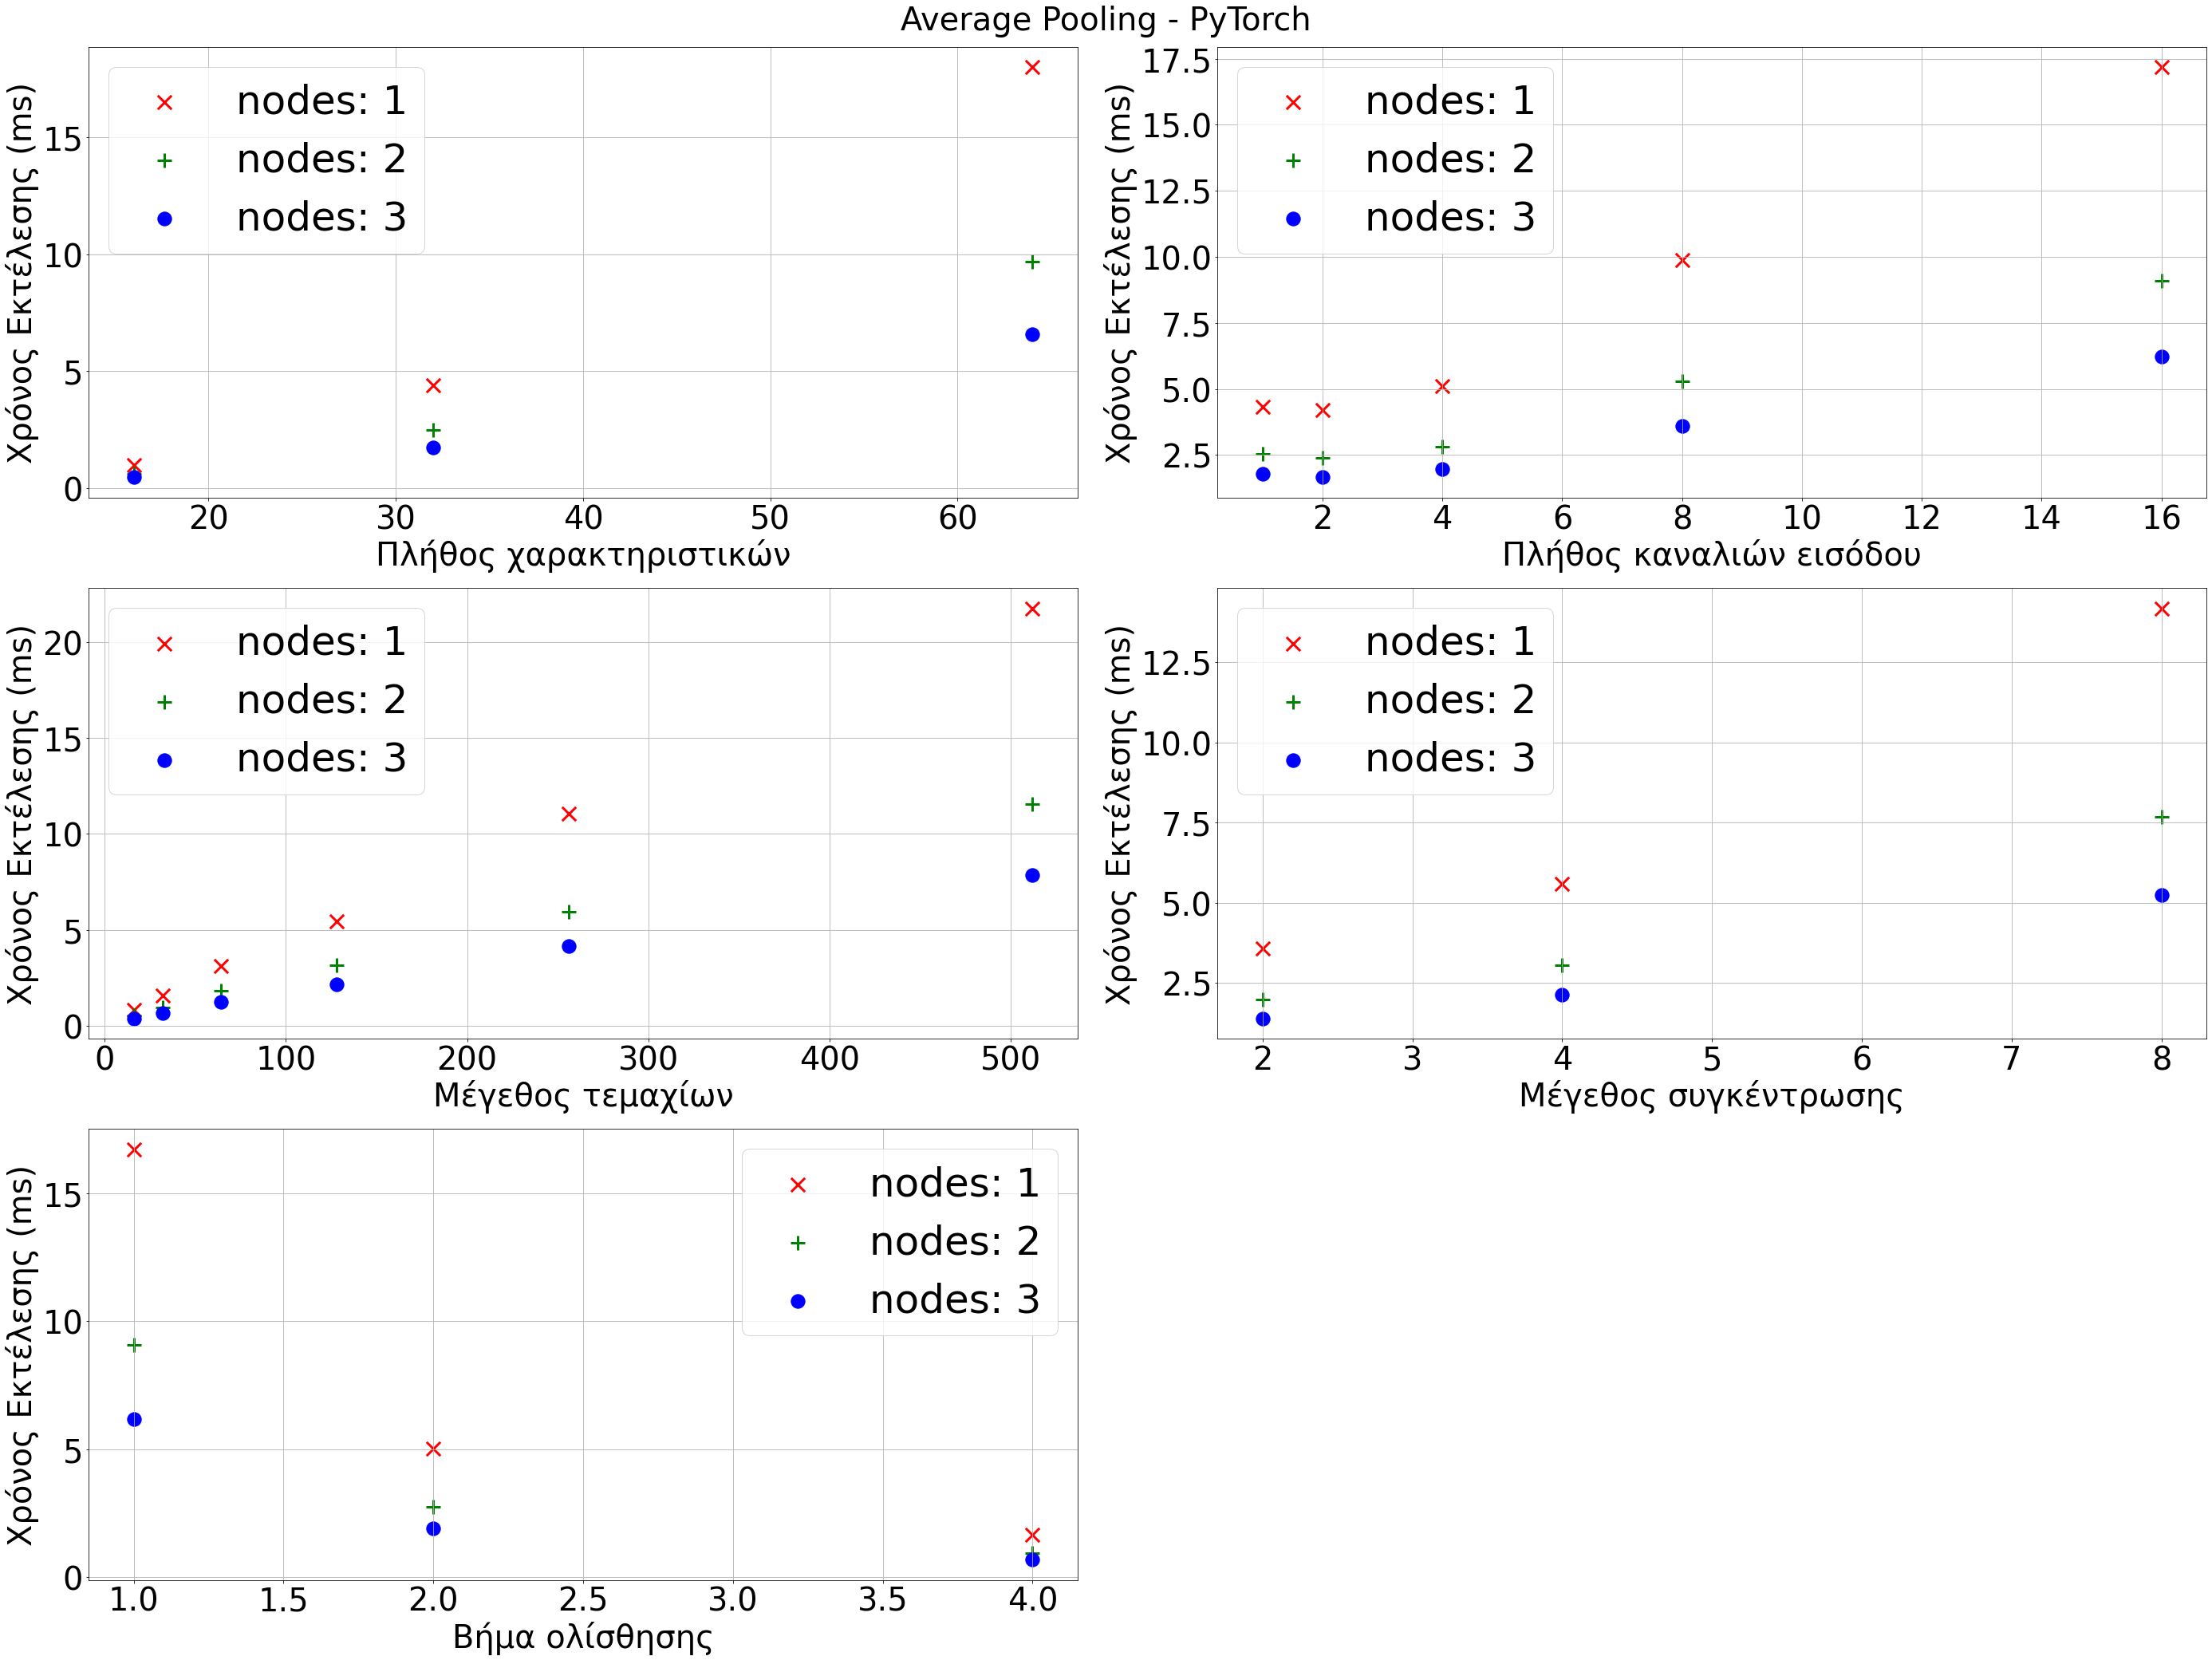

In [29]:
p = Pool('avg', dim, fw)

fig, axs = sub(3,2,'Average Pooling - {}'.format(p.the_fw(fw)),6)
axs[2,1].set_visible(False)

p.plot(axs[0,0], 'numf', 'Πλήθος χαρακτηριστικών')
p.plot(axs[0,1], 'channels', 'Πλήθος καναλιών εισόδου')
p.plot(axs[1,0], 'batch', 'Μέγεθος τεμαχίων')
p.plot(axs[1,1], 'pool', 'Μέγεθος συγκέντρωσης')
p.plot(axs[2,0], 'stride', 'Βήμα ολίσθησης')

plt.savefig('plots/{}_avg{}d'.format(fw,dim), facecolor='white')

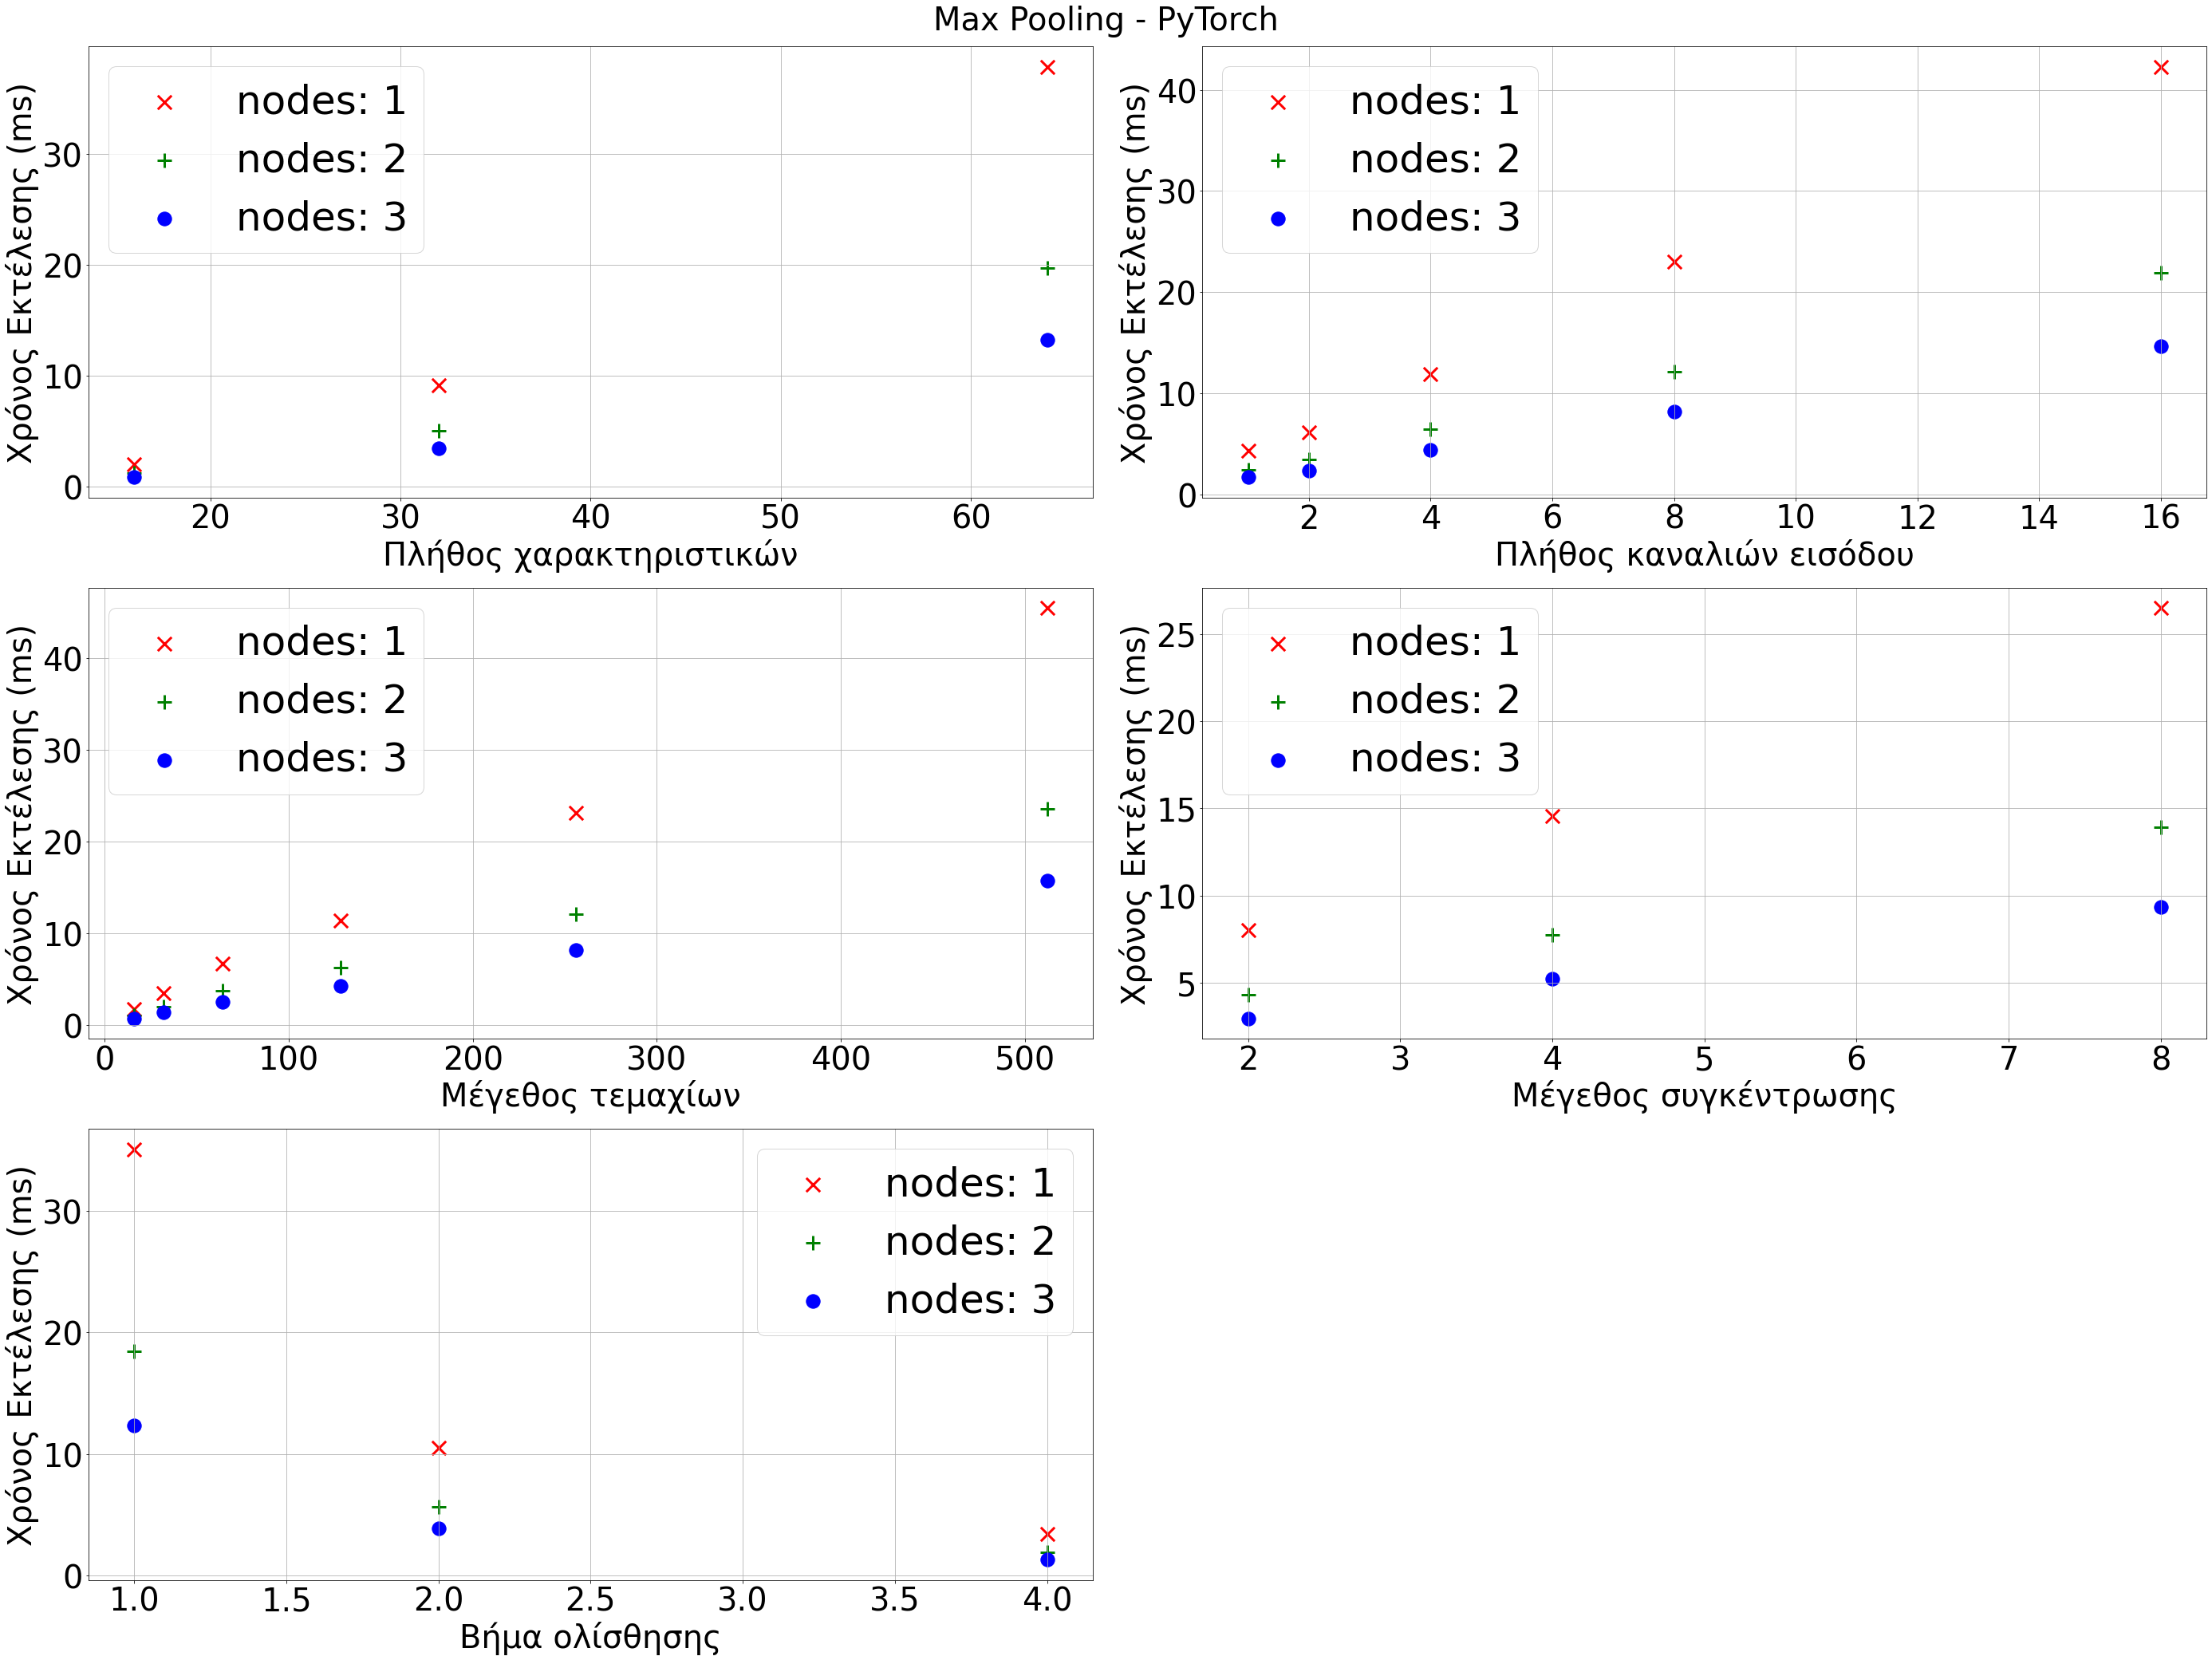

In [30]:
p = Pool('max', dim, fw)

fig, axs = sub(3,2,'Max Pooling - {}'.format(p.the_fw(fw)),6)
axs[2,1].set_visible(False)

p.plot(axs[0,0], 'numf', 'Πλήθος χαρακτηριστικών')
p.plot(axs[0,1], 'channels', 'Πλήθος καναλιών εισόδου')
p.plot(axs[1,0], 'batch', 'Μέγεθος τεμαχίων')
p.plot(axs[1,1], 'pool', 'Μέγεθος συγκέντρωσης')
p.plot(axs[2,0], 'stride', 'Βήμα ολίσθησης')

plt.savefig('plots/{}_max{}d'.format(fw,dim), facecolor='white')

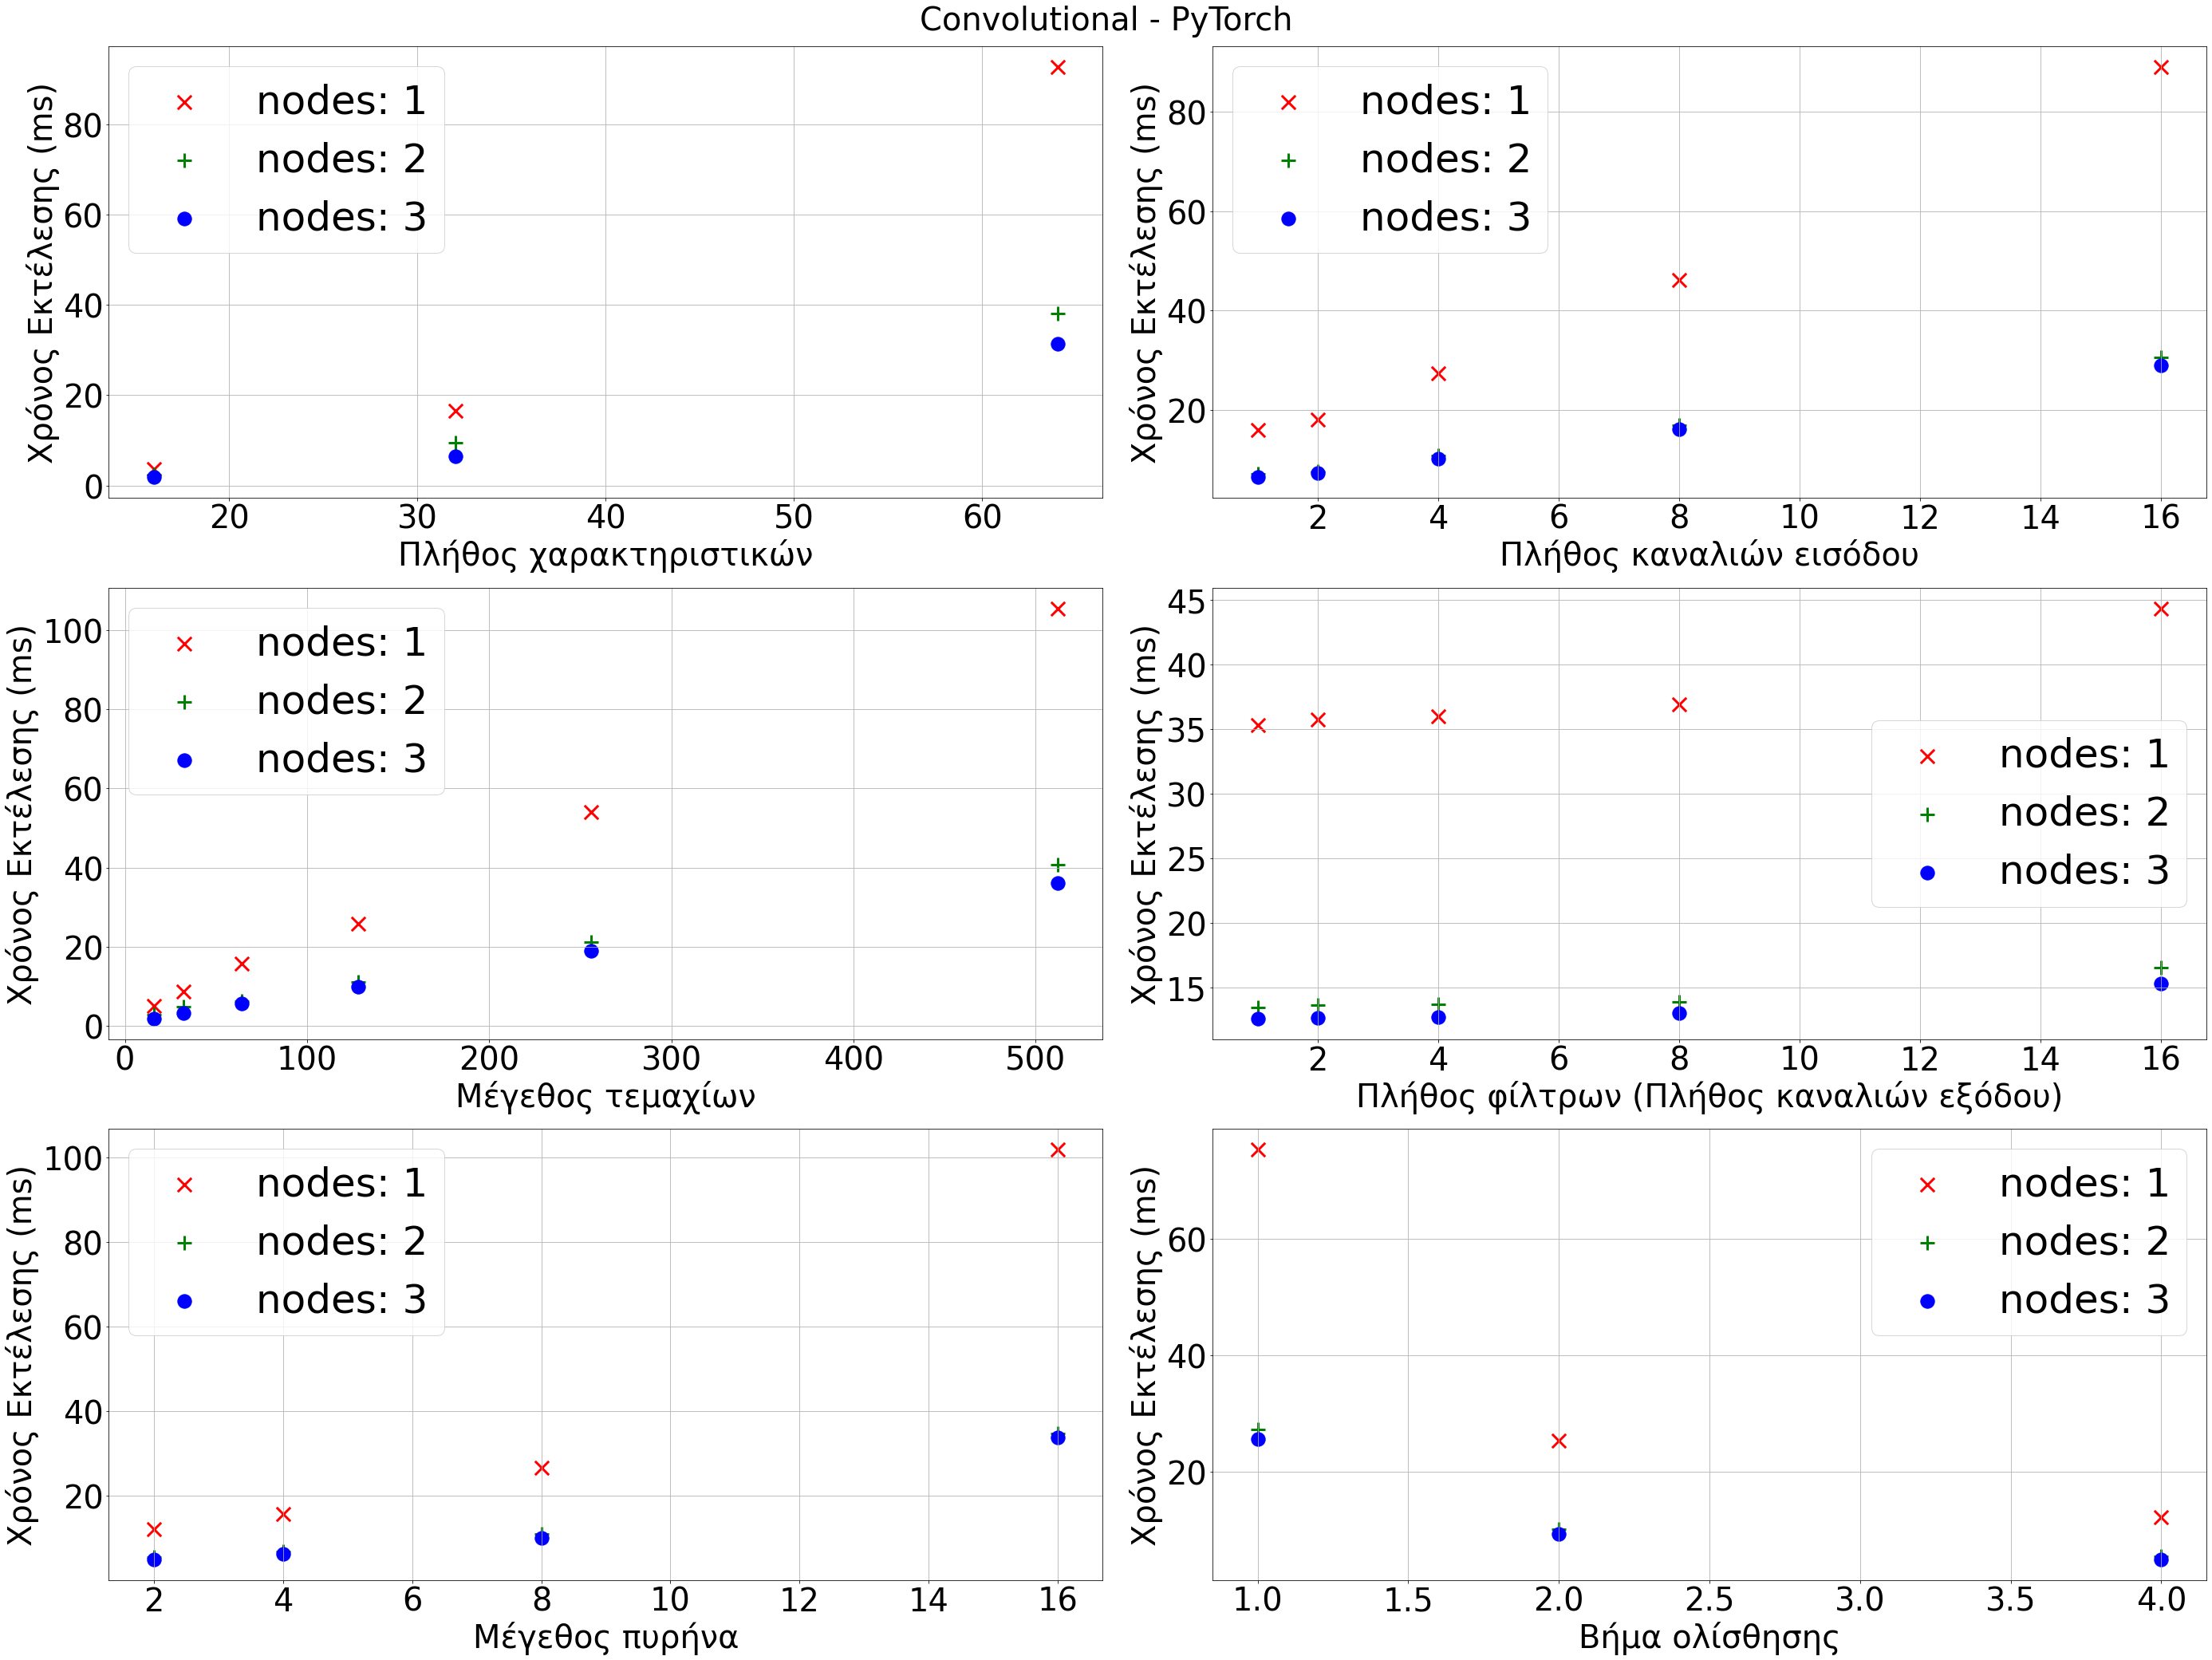

In [31]:
p = Conv(dim,fw)

fig, axs = sub(3,2,'Convolutional - {}'.format(p.the_fw(fw)),6)

p.plot(axs[0,0], 'numf', 'Πλήθος χαρακτηριστικών')
p.plot(axs[0,1], 'channels', 'Πλήθος καναλιών εισόδου')
p.plot(axs[1,0], 'batch', 'Μέγεθος τεμαχίων')

p.plot(axs[1,1], 'filters', 'Πλήθος φίλτρων (Πλήθος καναλιών εξόδου)')
p.plot(axs[2,0], 'kernel', 'Μέγεθος πυρήνα')
p.plot(axs[2,1], 'stride', 'Βήμα ολίσθησης')

plt.savefig('plots/{}_conv{}d'.format(fw,dim), facecolor='white')

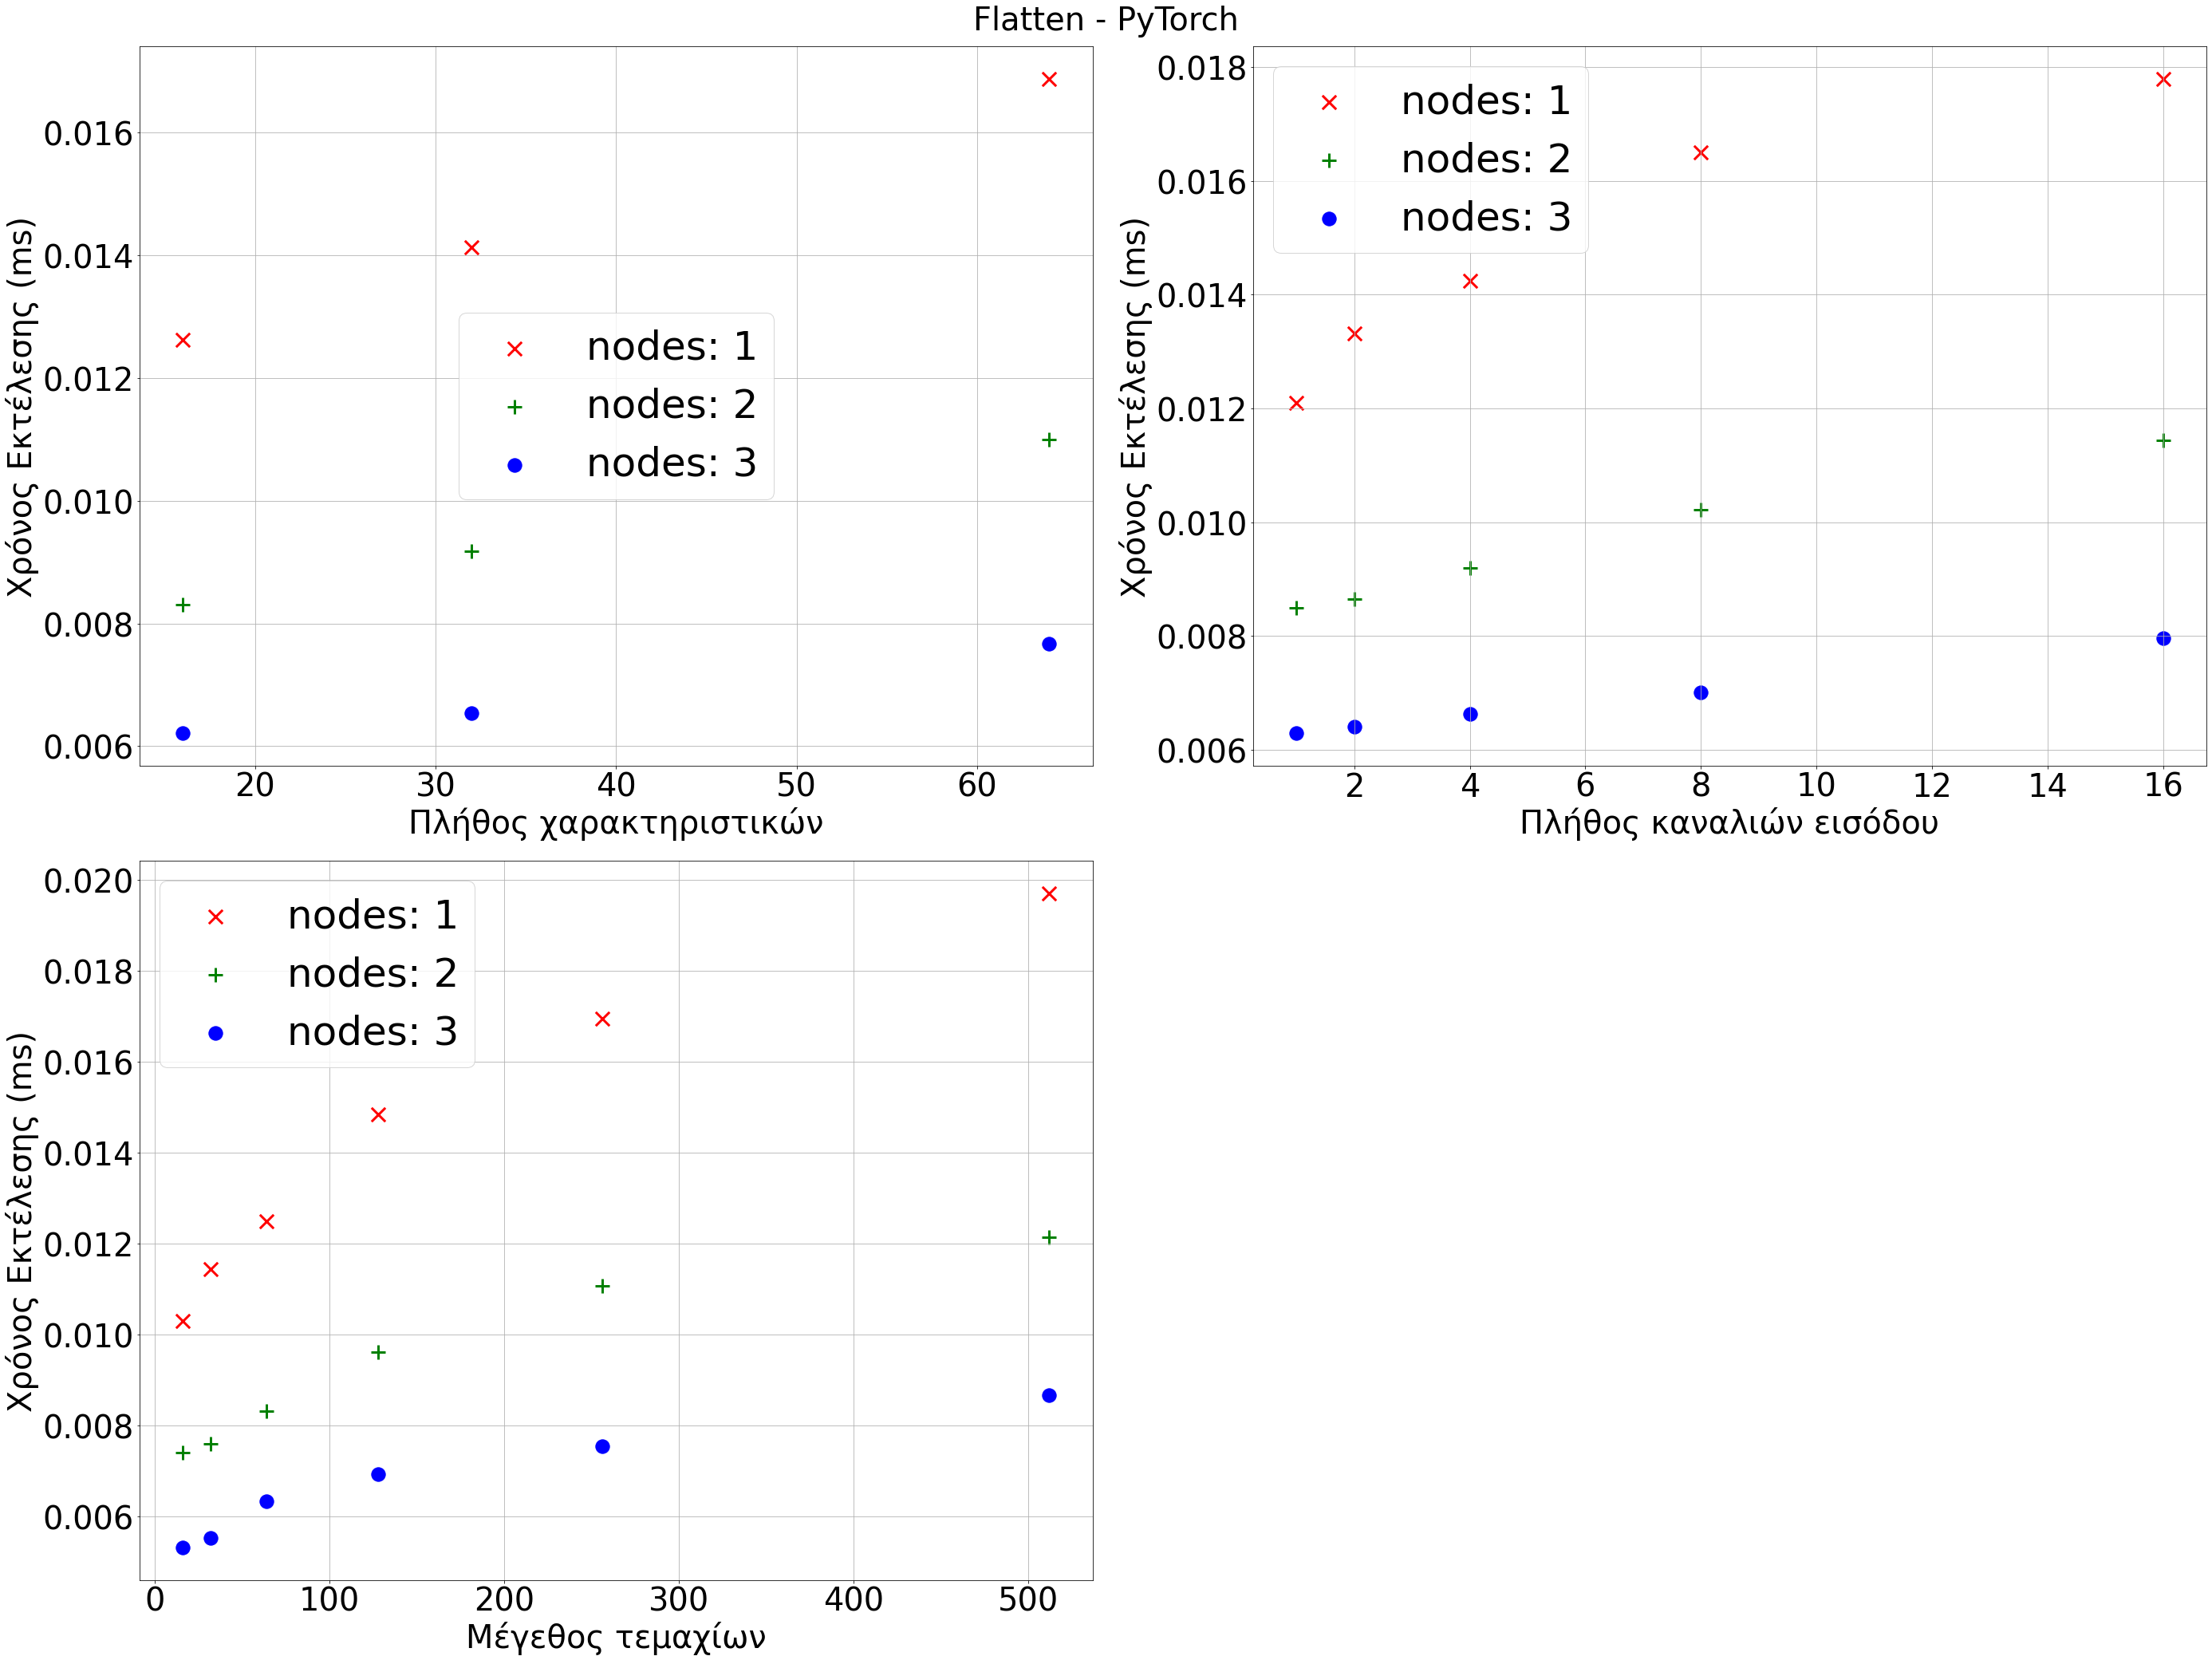

In [32]:
p = Rest('flatten', dim, fw)

fig, axs = sub(2,2,'Flatten - {}'.format(p.the_fw(fw)),6)
axs[1,1].set_visible(False)

p.plot(axs[0,0], 'numf', 'Πλήθος χαρακτηριστικών')
p.plot(axs[0,1], 'channels', 'Πλήθος καναλιών εισόδου')
p.plot(axs[1,0], 'batch', 'Μέγεθος τεμαχίων')

plt.savefig('plots/{}_flatten{}d'.format(fw,dim), facecolor='white')